# ML Models with Sentiment Analysis

This notebook analyses if there is a significant correlation between sentiment scores, derived from Reddit posts, and future stock returns. It also has four machine learning models implemented which show the differences between the use of traditional financial input data and additional sentiment scores.

Some parts of the code in this notebook were generated with the assistance of ChatGPT, an AI language model developed by OpenAI. However, every single line of code was manually reviewed by the author of this notebook.

### Table of Content

* [1. Data](#chapter1)
* [2. Analysis of Correlation between Sentiment Scores and Future Returns](#chapter2)
* [3. Preparation for Machine Learning](#chapter3)
* [4. Linear Regressioin](#chapter4)
* [5. Decision Tree](#chapter5)
* [6. Random Forest](#chapter6)
* [7. Artificial Neural Network](#chapter7)
* [8. Results](#chapter8)

## 1. Data <a class='anchor' id='chapter1'></a>

### 1.1 Read the data

The file financial_data.csv is the output from the jupyter notebook financial_data_preprocessing.ipynb.

In [49]:
import pandas as pd

# Read the financial features
financial_data = pd.read_csv('./data/financial_data.csv')

# Sort the dataframe by symbol and date
financial_data = financial_data.sort_values(by=['symbol', 'date'])

financial_data

,date,symbol,grossprofitmargin,operatingmargin,netprofitmargin,currentratio,debttoequityratio,operatingcashflow,eps,capitalexpenditures,...,stochastic_%k,stochastic_%d,atr,ichimoku_a,ichimoku_b,cci,return_next_1w,return_next_2w,return_next_3w,return_next_1m
0,2012-01-03,aapl,0.446831,0.374247,0.281959,1.582657,0.539976,1.755400e+10,14.013950,1.321000e+09,...,-84.815948,-102.041335,2.297438,14.067679,13.853929,156.486906,0.029205,0.013869,0.040899,0.106729
1,2012-01-04,aapl,0.446831,0.374247,0.281959,1.582657,0.539976,1.755400e+10,14.013950,1.321000e+09,...,-74.762182,-90.131285,2.303062,14.210447,13.892857,142.531088,0.022035,0.012306,0.039462,0.111842
2,2012-01-05,aapl,0.446831,0.374247,0.281959,1.582657,0.539976,1.755400e+10,14.013950,1.321000e+09,...,-60.651062,-73.409731,2.313385,14.316071,13.961964,146.542832,0.008038,-0.002587,0.064192,0.109896
3,2012-01-06,aapl,0.446831,0.374247,0.281959,1.582657,0.539976,1.755400e+10,14.013950,1.321000e+09,...,-50.871771,-62.095005,2.323770,14.488125,14.036964,156.594838,-0.006132,0.018104,0.059896,0.109920
4,2012-01-09,aapl,0.446831,0.374247,0.281959,1.582657,0.539976,1.755400e+10,14.013950,1.321000e+09,...,-49.595079,-53.705971,2.336732,14.586518,14.126250,146.893501,0.007042,-0.010101,0.085797,0.130296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174142,2024-02-22,zg,0.757384,-0.221519,-0.154008,3.243048,0.469730,8.600000e+07,-0.880473,4.000000e+07,...,4.773287,7.691142,2.143288,54.655000,51.160000,-128.723125,0.054829,0.000000,-0.017018,-0.028878
174143,2024-02-23,zg,0.757384,-0.221519,-0.154008,3.243048,0.469730,8.600000e+07,-0.880473,4.000000e+07,...,7.159931,7.120145,2.050910,54.914999,51.320000,-122.920169,0.080272,0.010255,-0.176848,-0.055588
174144,2024-02-26,zg,0.757384,-0.221519,-0.154008,3.243048,0.469730,8.600000e+07,-0.880473,4.000000e+07,...,9.665886,7.199702,2.001559,55.022499,51.320000,-92.937311,0.071816,-0.001625,-0.155933,-0.068719
174145,2024-02-27,zg,0.757384,-0.221519,-0.154008,3.243048,0.469730,8.600000e+07,-0.880473,4.000000e+07,...,21.718371,12.848063,1.968590,55.039999,51.664999,-61.149357,-0.005126,0.046565,-0.141138,-0.058098


The file reddit_sentiment.csv is the output from the jupyter notebook sentiment_analysis.ipynb.

In [50]:
# Read the reddit sentiment data
sentiment_data = pd.read_csv('./data/reddit_sentiment.csv')

# Sort the dataframe by stock and post date
sentiment_data = sentiment_data.sort_values(by=['stock', 'post date'])

sentiment_data

,stock,post date,post score,textblob polarity,textblob subjectivity,distilroberta label,distilroberta score,adjusted_distilroberta_score
0,aapl,2023-05-06,0.001251,0.062957,0.375081,0.0,0.996256,0.000000
1,aapl,2023-05-06,0.000000,0.050827,0.379600,1.0,0.998496,0.998496
2,aapl,2023-05-06,0.026095,0.376623,0.637103,0.0,0.994433,0.000000
3,aapl,2023-05-07,0.046828,0.278333,0.613333,1.0,0.999334,0.999334
4,aapl,2023-05-08,0.016086,0.650000,0.625000,0.0,0.783868,0.000000
...,...,...,...,...,...,...,...,...
5567,uber,2024-05-14,0.008097,0.059118,0.433766,1.0,0.563117,0.563117
5568,uber,2024-05-15,0.002167,0.096548,0.380741,0.0,0.971001,0.000000
5569,uber,2024-05-15,0.000000,0.130357,0.510714,1.0,0.998841,0.998841
5570,uber,2024-05-18,0.006956,0.244146,0.693526,1.0,0.965972,0.965972


### 1.2 Filter the data

For a better overview, the analysis is limited to only five stocks. It makes the most sense to select those five for which we have the highest amount of Reddit data. The following function calculates the number of Reddit posts for each stock and prints this information in a dataframe.

Therefore, the following five stocks are selected for further analysis:
1. Alphabet Inc.
2. Apple Inc.
3. Amazon.com, Inc.
4. Nvidia Corporation
5. Microsoft Corporation

In [51]:
def print_stock_row_counts(df):
    import pandas as pd

    # Group the dataframe by 'stock' and counting the number of rows for each stock
    stock_counts = df['stock'].value_counts().reset_index()
    stock_counts.columns = ['Stock', 'Number of Rows']

    # Sort the dataframe by 'Number of Rows' in descending order
    stock_counts = stock_counts.sort_values(by='Number of Rows', ascending=False).reset_index(drop=True)

    # Print the dataframe
    print(stock_counts)

print_stock_row_counts(sentiment_data)

   Stock  Number of Rows
0   goog             686
1   aapl             629
2   amzn             595
3   nvda             535
4   msft             518
5   tsla             483
6   meta             409
7    amd             393
8   intc             312
9   nflx             206
10  pypl             192
11  uber             150
12  orcl              82
13  adbe              80
14   ibm              76
15   crm              67
16  csco              62
17  crwd              41
18  qcom              31
19   ttd              25


In [52]:
# List of stocks to retain
stocks_to_keep = ['goog', 'aapl', 'amzn', 'nvda', 'msft']

# Filtering the dataframes
financial_filtered = financial_data[financial_data['symbol'].isin(stocks_to_keep)]
sentiment_filtered = sentiment_data[sentiment_data['stock'].isin(stocks_to_keep)]

### 1.3 Merge the financial data and the sentiment data

The following code ensures the date columns in sentiment_filtered and financial_filtered data frames are in datetime format, then creates a copy of financial_filtered. It defines a function to calculate the weighted mean of sentiment scores over the last week for a given stock, and applies this function to populate new columns (textblob_polarity and adjusted_distilroberta_score) in the copied data frame, finally dropping any rows with missing values.

In [54]:
import numpy as np

# Ensure the date columns are in datetime format
sentiment_filtered.loc[:, 'post date'] = pd.to_datetime(sentiment_filtered['post date'])
financial_filtered.loc[:, 'date'] = pd.to_datetime(financial_filtered['date'])

merged_df = financial_filtered.copy()

# Calculate the weighted mean of the sentiment scores over the last week
def calculate_weighted_mean(sentiment_df, date, stock, window=7):
    start_date = date - pd.Timedelta(days=window)
    relevant_data = sentiment_df[
        (sentiment_df['stock'] == stock) &
        (sentiment_df['post date'] >= start_date) &
        (sentiment_df['post date'] <= date)
    ]
    if relevant_data.empty:
        return np.nan, np.nan  # Ensure it returns a tuple
    weights = relevant_data['post score'] / relevant_data['post score'].sum()
    weighted_textblob_polarity = (relevant_data['textblob polarity'] * weights).sum()
    weighted_distilroberta_score = (relevant_data['adjusted_distilroberta_score'] * weights).sum()
    return weighted_textblob_polarity, weighted_distilroberta_score

# Apply this function to the financial_data
merged_df['textblob_polarity'] = np.nan
merged_df['adjusted_distilroberta_score'] = np.nan

for idx, row in merged_df.iterrows():
    weighted_textblob_polarity, weighted_distilroberta_score = calculate_weighted_mean(
        sentiment_filtered, row['date'], row['symbol']
    )
    merged_df.at[idx, 'textblob_polarity'] = weighted_textblob_polarity
    merged_df.at[idx, 'adjusted_distilroberta_score'] = weighted_distilroberta_score

merged_df = merged_df.dropna()
merged_df

,date,symbol,grossprofitmargin,operatingmargin,netprofitmargin,currentratio,debttoequityratio,operatingcashflow,eps,capitalexpenditures,...,atr,ichimoku_a,ichimoku_b,cci,return_next_1w,return_next_2w,return_next_3w,return_next_1m,textblob_polarity,adjusted_distilroberta_score
2854,2023-05-08 00:00:00,aapl,0.442617,0.298600,0.254756,0.940354,4.343801,2.856000e+10,1.536563,2.916000e+09,...,3.289458,167.795002,159.099998,180.083153,-0.006870,0.012379,0.017796,0.026317,0.363875,0.525969
2855,2023-05-09 00:00:00,aapl,0.442617,0.298600,0.254756,0.940354,4.343801,2.856000e+10,1.536563,2.916000e+09,...,3.193067,168.172501,159.099998,138.482842,0.003132,-0.002964,0.033166,0.052685,0.363875,0.525969
2856,2023-05-10 00:00:00,aapl,0.442617,0.298600,0.254756,0.940354,4.343801,2.856000e+10,1.536563,2.916000e+09,...,3.191561,168.172501,159.099998,140.530486,-0.003636,-0.004922,0.048010,0.044079,0.200337,-0.089277
2857,2023-05-11 00:00:00,aapl,0.442617,0.298600,0.254756,0.940354,4.343801,2.856000e+10,1.536563,2.916000e+09,...,3.136449,168.317497,159.244995,129.201472,0.008876,-0.011768,0.046014,0.059247,0.200337,-0.089277
2858,2023-05-12 00:00:00,aapl,0.442617,0.298600,0.254756,0.940354,4.343801,2.856000e+10,1.536563,2.916000e+09,...,3.130988,168.317497,159.244995,96.267141,0.015008,0.001541,0.023656,0.062236,0.200337,-0.089277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115470,2024-02-22 00:00:00,nvda,0.759671,0.615934,0.555807,4.171292,0.529341,1.149900e+10,50.360332,2.540000e+08,...,30.486642,695.345001,620.895004,147.280118,0.007309,0.171420,-0.050988,0.200609,-0.024718,0.552896
115471,2024-02-23 00:00:00,nvda,0.759671,0.615934,0.555807,4.171292,0.529341,1.149900e+10,50.360332,2.540000e+08,...,31.754738,717.857498,641.119995,168.883441,0.043925,0.063845,0.003530,0.205406,-0.029061,0.308988
115472,2024-02-26 00:00:00,nvda,0.759671,0.615934,0.555807,4.171292,0.529341,1.149900e+10,50.360332,2.540000e+08,...,31.015831,720.652496,641.119995,150.270322,0.077694,0.006347,0.031257,0.170350,0.090707,0.646382
115473,2024-02-27 00:00:00,nvda,0.759671,0.615934,0.555807,4.171292,0.529341,1.149900e+10,50.360332,2.540000e+08,...,30.456128,724.052490,642.199997,121.101811,0.092337,0.069203,-0.027363,0.146799,0.089756,0.641016


## 2. Analysis of Correlation between Sentiment Scores and Future Returns <a class='anchor' id='chapter2'></a>

This chapter analyses if there is a correlation between sentiment scores (textblob_polarity and adjusted_distilroberta_score) and future stock returns.

### 2.1 Pearson's and Spearman's Coefficients

Pearson's coefficient and Spearman's coefficient are applied the analyse the correlation between the sentiment scores and future one week, two week, three week, and one month return. The correlation appears to be the strongest with the future two week return.

In [55]:
# Define the columns to calculate correlations for
sentiment_columns = ['textblob_polarity', 'adjusted_distilroberta_score']
return_columns = ['return_next_1w', 'return_next_2w', 'return_next_3w', 'return_next_1m']

# Initialize dictionaries to store the correlation results
pearson_correlations = {col: [] for col in sentiment_columns}
spearman_correlations = {col: [] for col in sentiment_columns}

# Calculate Pearson's and Spearman's correlation coefficients
for sentiment_col in sentiment_columns:
    for return_col in return_columns:
        pearson_corr = merged_df[sentiment_col].corr(merged_df[return_col], method='pearson')
        spearman_corr = merged_df[sentiment_col].corr(merged_df[return_col], method='spearman')
        pearson_correlations[sentiment_col].append(pearson_corr)
        spearman_correlations[sentiment_col].append(spearman_corr)

# Convert dictionaries to DataFrames for better presentation
pearson_corr_df = pd.DataFrame(pearson_correlations, index=return_columns)
spearman_corr_df = pd.DataFrame(spearman_correlations, index=return_columns)

# Print the correlation tables
print("Pearson's Correlation Coefficients:")
print(pearson_corr_df)
print("\nSpearman's Correlation Coefficients:")
print(spearman_corr_df)

Pearson's Correlation Coefficients:
                textblob_polarity  adjusted_distilroberta_score
return_next_1w          -0.085775                      0.020140
return_next_2w          -0.114930                     -0.106598
return_next_3w           0.018289                      0.021373
return_next_1m          -0.068772                     -0.012273

Spearman's Correlation Coefficients:
                textblob_polarity  adjusted_distilroberta_score
return_next_1w          -0.084748                     -0.012394
return_next_2w          -0.139872                     -0.124290
return_next_3w          -0.030775                     -0.007897
return_next_1m          -0.108654                     -0.017794


### 2.2 Linear Regression

The linear regression models show a significant relationship between both sentiment scores and the future two week returns.

In [56]:
import statsmodels.api as sm

# Variables X and Y
X_textblob = sm.add_constant(merged_df['textblob_polarity'])  # Add a constant term to the predictor
X_distilroberta = sm.add_constant(merged_df['adjusted_distilroberta_score'])
Y = merged_df['return_next_2w']

# Fit the models
model_textblob = sm.OLS(Y, X_textblob).fit()
model_distilroberta = sm.OLS(Y, X_distilroberta).fit()

# Make predictions
predictions_textblob = model_textblob.predict(X_textblob)
predictions_distilroberta  = model_distilroberta.predict(X_textblob)

# Print the summary for textblob
print(model_textblob.summary())

                            OLS Regression Results                            
Dep. Variable:         return_next_2w   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.17
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           0.000299
Time:                        17:05:52   Log-Likelihood:                 1782.6
No. Observations:                 986   AIC:                            -3561.
Df Residuals:                     984   BIC:                            -3551.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0127      0.00

In [57]:
# Print the summary for distilroberta
print(model_distilroberta.summary())

                            OLS Regression Results                            
Dep. Variable:         return_next_2w   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.31
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           0.000801
Time:                        17:05:52   Log-Likelihood:                 1781.7
No. Observations:                 986   AIC:                            -3559.
Df Residuals:                     984   BIC:                            -3550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### 2.3 Scatterplots of Textblob Polarity/Adjusted Distilroberta Score vs. Return of subsequent 2 Weeks

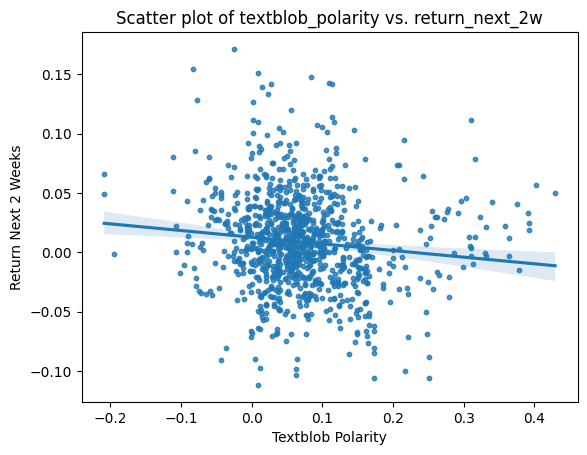

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of textblob_polarity vs. return_next_2w
sns.regplot(x='textblob_polarity', y='return_next_2w', data=merged_df, scatter_kws={'s':10})
plt.title("Scatter plot of textblob_polarity vs. return_next_2w")
plt.xlabel("Textblob Polarity")
plt.ylabel("Return Next 2 Weeks")
plt.show()

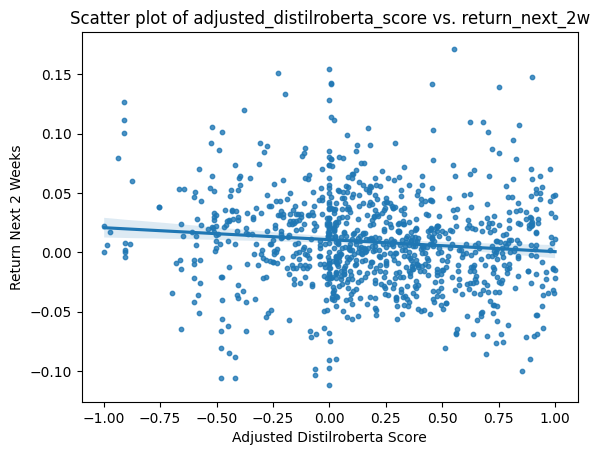

In [59]:
# Scatter plot of adjusted_distilroberta_score vs. return_next_2w
sns.regplot(x='adjusted_distilroberta_score', y='return_next_2w', data=merged_df, scatter_kws={'s':10})
plt.title("Scatter plot of adjusted_distilroberta_score vs. return_next_2w")
plt.xlabel("Adjusted Distilroberta Score")
plt.ylabel("Return Next 2 Weeks")
plt.show()

## 3. Preparation for Machine Learning <a class='anchor' id='chapter3'></a>

This section prepares the data for the upcoming machine learning models.

### 3.1 Feature Selection

The large number of variables that were created during the feature engineering task makes it necessary to implement feature selection techniques to reduce them to the most important ones. This part of the project ensures that the models can focus on the most relevant input variables. The best ten features were calculated with Granger Causality and ten features were chosen with Feature Correlation. Consequently, the union of both ten feature sets was used to form a set of 16 features in total.

In [60]:
# Current variables
merged_df.columns

Index(['date', 'symbol', 'grossprofitmargin', 'operatingmargin',
       'netprofitmargin', 'currentratio', 'debttoequityratio',
       'operatingcashflow', 'eps', 'capitalexpenditures', 'freecashflow',
       'ebit', 'fedfunds', 'month', 'return_1d', 'return_2d', 'return_3d',
       'return_4d', 'return_5d', 'return_6d', 'return_7d', 'return_8d',
       'return_9d', 'return_2w', 'return_3w', 'return_1m', 'return_2m',
       'return_3m', 'return_6m', 'return_1y', 'return_2y', 'p/e ratio',
       'sma_50', 'ema_50', 'rsi', 'bollinger_high', 'bollinger_low', 'macd',
       'stochastic_%k', 'stochastic_%d', 'atr', 'ichimoku_a', 'ichimoku_b',
       'cci', 'return_next_1w', 'return_next_2w', 'return_next_3w',
       'return_next_1m', 'textblob_polarity', 'adjusted_distilroberta_score'],
      dtype='object')

In [61]:
from statsmodels.tsa.stattools import grangercausalitytests

# List of features (no date, no symbol, no target variables)
features = ['grossprofitmargin', 'operatingmargin', 'netprofitmargin', 'currentratio',
            'debttoequityratio', 'operatingcashflow', 'eps', 'capitalexpenditures',
            'freecashflow', 'ebit', 'fedfunds', 'month', 'return_1d', 'return_2d',
            'return_3d', 'return_4d', 'return_5d', 'return_6d', 'return_7d',
            'return_8d', 'return_9d', 'return_2w', 'return_3w', 'return_1m',
            'return_2m', 'return_3m', 'return_6m', 'return_1y', 'return_2y',
            'p/e ratio', 'sma_50', 'ema_50', 'rsi', 'bollinger_high', 'bollinger_low',
            'macd', 'stochastic_%k', 'stochastic_%d', 'atr', 'ichimoku_a', 'ichimoku_b',
            'cci', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']

# Define the target variable
target_variable = 'return_next_2w'

# Function to calculate feature correlation
def calculate_feature_correlation(df, features, target):
    corr_matrix = df[features].corr()
    target_corr = corr_matrix[target].drop(target)
    abs_target_corr = target_corr.abs()
    sorted_corr = abs_target_corr.sort_values(ascending=False)
    return sorted_corr

# Function to perform Granger Causality test
def granger_causality_tests(df, features, target, max_lag):
    results = {}
    for feature in features:
        if feature != target:
            test_result = grangercausalitytests(df[[target, feature]], max_lag)
            p_values = [round(test_result[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lag)]
            min_p_value = min(p_values)
            results[feature] = min_p_value
    sorted_results = sorted(results.items(), key=lambda x: x[1])
    return sorted_results

# Calculate feature correlation
correlation_results = calculate_feature_correlation(merged_df, features, target_variable)

# Perform Granger Causality test with a maximum lag of 5
max_lag = 5
gc_results = granger_causality_tests(merged_df, features, target_variable, max_lag)

# Select top N features based on correlation
top_n_corr_features = correlation_results.head(10).index.tolist()

# Select top N features based on Granger Causality test
top_n_gc_features = [feature for feature, p_value in gc_results[:10]]

# Combine and deduplicate the top features
combined_features = list(set(top_n_corr_features + top_n_gc_features))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9175  , p=0.3384  , df_denom=982, df_num=1
ssr based chi2 test:   chi2=0.9203  , p=0.3374  , df=1
likelihood ratio test: chi2=0.9199  , p=0.3375  , df=1
parameter F test:         F=0.9175  , p=0.3384  , df_denom=982, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7230  , p=0.4855  , df_denom=979, df_num=2
ssr based chi2 test:   chi2=1.4534  , p=0.4835  , df=2
likelihood ratio test: chi2=1.4523  , p=0.4838  , df=2
parameter F test:         F=0.7230  , p=0.4855  , df_denom=979, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9510  , p=0.4153  , df_denom=976, df_num=3
ssr based chi2 test:   chi2=2.8734  , p=0.4116  , df=3
likelihood ratio test: chi2=2.8692  , p=0.4122  , df=3
parameter F test:         F=0.9510  , p=0.4153  , df_denom=976, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8938  , p=0.4670  

In [62]:
# Print the top features from both methods
print("Top features based on Feature Correlation:")
print(top_n_corr_features)
print("\nTop features based on Granger Causality Test:")
print(top_n_gc_features)

# Print the combined top features
print("\nCombined top features:")
print(combined_features)

Top features based on Feature Correlation:
['eps', 'bollinger_high', 'atr', 'return_1y', 'currentratio', 'ichimoku_a', 'ema_50', 'ichimoku_b', 'sma_50', 'bollinger_low']

Top features based on Granger Causality Test:
['atr', 'currentratio', 'p/e ratio', 'return_2y', 'eps', 'return_1y', 'macd', 'return_1d', 'return_2d', 'return_1m']

Combined top features:
['ichimoku_a', 'ema_50', 'return_1y', 'p/e ratio', 'return_2y', 'eps', 'ichimoku_b', 'sma_50', 'atr', 'return_1m', 'return_2d', 'bollinger_low', 'macd', 'return_1d', 'currentratio', 'bollinger_high']


In [63]:
# Filter the dataframe with the selected top features
selected_features_df = merged_df[['symbol'] + combined_features + ['textblob_polarity'] + ['adjusted_distilroberta_score'] + [target_variable]]
selected_features_df

,symbol,ichimoku_a,ema_50,return_1y,p/e ratio,return_2y,eps,ichimoku_b,sma_50,atr,return_1m,return_2d,bollinger_low,macd,return_1d,currentratio,bollinger_high,textblob_polarity,adjusted_distilroberta_score,return_next_2w
2854,aapl,167.795002,160.432813,0.113421,112.314858,0.353387,1.536563,159.099998,159.425634,3.289458,0.053686,0.046505,159.044664,0.261468,-0.000403,0.940354,172.392227,0.363875,0.525969,0.012379
2855,aapl,168.172501,160.841644,0.097133,111.194949,0.332792,1.536563,159.099998,159.900101,3.193067,0.060112,-0.010371,159.785754,0.239056,-0.009971,0.940354,172.742313,0.363875,0.525969,-0.002964
2856,aapl,168.172501,161.304267,0.146621,112.353706,0.382352,1.536563,159.099998,160.420325,3.191561,0.079353,0.000346,160.731609,0.301666,0.010421,0.940354,173.135313,0.200337,-0.089277,-0.004922
2857,aapl,168.317497,161.756158,0.129675,112.476685,0.394196,1.536563,159.244995,160.986105,3.136449,0.085259,0.011527,160.727734,0.312028,0.001095,0.940354,173.953839,0.200337,-0.089277,-0.011768
2858,aapl,168.317497,162.153610,0.184986,111.867351,0.422109,1.536563,159.244995,161.521222,3.130988,0.043783,-0.004329,160.973863,0.216577,-0.005417,0.940354,174.463547,0.200337,-0.089277,0.001541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115470,nvda,695.345001,610.826434,2.804059,15.594479,2.209137,50.360332,620.895004,584.378788,30.486642,0.311743,0.130824,586.836437,-0.805524,0.164009,4.171292,780.137446,-0.024718,0.552896,0.171420
115471,nvda,717.857498,617.779633,2.799363,15.649877,2.338368,50.360332,641.119995,590.816486,31.754738,0.284459,0.168144,590.456950,1.846846,0.003552,4.171292,793.716127,-0.029061,0.308988,0.063845
115472,nvda,720.652496,624.567995,2.343775,15.704481,2.386109,50.360332,641.119995,597.103191,31.015831,0.283607,0.007054,598.082006,3.179938,0.003489,4.171292,804.151221,0.090707,0.646382,0.006347
115473,nvda,724.052490,630.936822,2.381256,15.626845,2.520326,50.360332,642.199997,603.225504,30.456128,0.289525,-0.001472,606.003955,3.183996,-0.004944,4.171292,812.464508,0.089756,0.641016,0.069203


### 3.2 Numpy arrays and scaling

The data set is splitted into single data frames for each stock. For a higher computational efficiency, the data frames are converted to numpy arrays. Then the data is scaled using the Scikit-Learn StandardScaler() function. The Standard Scaler calculates the mean and standard deviation during fitting and applies the transformation to standardise the data during transformation. This preprocessing step is crucial to improve the performance and stability of machine learning algorithms.

In [65]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Filter the df for the five selected stocks
goog_df = selected_features_df[selected_features_df['symbol'] == 'goog']
aapl_df = selected_features_df[selected_features_df['symbol'] == 'aapl']
amzn_df = selected_features_df[selected_features_df['symbol'] == 'amzn']
nvda_df = selected_features_df[selected_features_df['symbol'] == 'nvda']
msft_df = selected_features_df[selected_features_df['symbol'] == 'msft']

# Convert the dataframes to numpy arrays (without sentiment analysis scores)
X_goog = np.asarray(goog_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']))
X_aapl = np.asarray(aapl_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']))
X_amzn = np.asarray(amzn_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']))
X_nvda = np.asarray(nvda_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']))
X_msft = np.asarray(msft_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']))

# Convert the dataframes to numpy arrays (with sentiment analysis scores)
X_goog_sa = np.asarray(goog_df.drop(columns=['symbol', 'return_next_2w']))
X_aapl_sa = np.asarray(aapl_df.drop(columns=['symbol', 'return_next_2w']))
X_amzn_sa = np.asarray(amzn_df.drop(columns=['symbol', 'return_next_2w']))
X_nvda_sa = np.asarray(nvda_df.drop(columns=['symbol', 'return_next_2w']))
X_msft_sa = np.asarray(msft_df.drop(columns=['symbol', 'return_next_2w']))

# Create scaler instances
scaler_goog = StandardScaler()
scaler_aapl = StandardScaler()
scaler_amzn = StandardScaler()
scaler_nvda = StandardScaler()
scaler_msft = StandardScaler()
scaler_goog_sa = StandardScaler()
scaler_aapl_sa = StandardScaler()
scaler_amzn_sa = StandardScaler()
scaler_nvda_sa = StandardScaler()
scaler_msft_sa = StandardScaler()

# Fit and transform the data to scale it
X_goog_scaled = scaler_goog.fit_transform(X_goog)
X_aapl_scaled = scaler_aapl.fit_transform(X_aapl)
X_amzn_scaled = scaler_amzn.fit_transform(X_amzn)
X_nvda_scaled = scaler_nvda.fit_transform(X_nvda)
X_msft_scaled = scaler_msft.fit_transform(X_msft)
X_goog_scaled_sa = scaler_goog.fit_transform(X_goog_sa)
X_aapl_scaled_sa = scaler_aapl.fit_transform(X_aapl_sa)
X_amzn_scaled_sa = scaler_amzn.fit_transform(X_amzn_sa)
X_nvda_scaled_sa = scaler_nvda.fit_transform(X_nvda_sa)
X_msft_scaled_sa = scaler_msft.fit_transform(X_msft_sa)

# Show the shape of X_goog_scaled
X_goog_scaled.shape

(198, 16)

In [66]:
# Convert the target variable to a numpy array
Y_goog = np.asarray(goog_df[['return_next_2w']])
Y_aapl = np.asarray(aapl_df[['return_next_2w']])
Y_amzn = np.asarray(amzn_df[['return_next_2w']])
Y_nvda = np.asarray(nvda_df[['return_next_2w']])
Y_msft = np.asarray(msft_df[['return_next_2w']])

# Create scaler instances
target_scaler_goog = StandardScaler()
target_scaler_aapl = StandardScaler()
target_scaler_amzn = StandardScaler()
target_scaler_nvda = StandardScaler()
target_scaler_msft = StandardScaler()

# Fit and transform the data to scale it
Y_goog_scaled = target_scaler_goog.fit_transform(Y_goog)
Y_aapl_scaled = target_scaler_aapl.fit_transform(Y_aapl)
Y_amzn_scaled = target_scaler_amzn.fit_transform(Y_amzn)
Y_nvda_scaled = target_scaler_nvda.fit_transform(Y_nvda)
Y_msft_scaled = target_scaler_msft.fit_transform(Y_msft)

# Reshape Y
Y_goog = Y_goog.reshape(-1)
Y_aapl = Y_aapl.reshape(-1)
Y_amzn = Y_amzn.reshape(-1)
Y_nvda = Y_nvda.reshape(-1)
Y_msft = Y_msft.reshape(-1)

# Reshape Y_scaled
Y_goog_scaled = Y_goog_scaled.reshape(-1)
Y_aapl_scaled = Y_aapl_scaled.reshape(-1)
Y_amzn_scaled = Y_amzn_scaled.reshape(-1)
Y_nvda_scaled = Y_nvda_scaled.reshape(-1)
Y_msft_scaled = Y_msft_scaled.reshape(-1)

# Show the shape of Y_goog_scaled
Y_goog_scaled.shape

(198,)

### 3.3 Split the data into train and test sets

The scaled numpy arrays are split into 90% train and 10% test data sets.

In [67]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test data with random_state for reproducibility (without sentiment analysis scores)
X_goog_train, X_goog_test, y_goog_train, y_goog_test = train_test_split(X_goog_scaled, Y_goog_scaled, test_size=0.1, random_state=10) 
X_aapl_train, X_aapl_test, y_aapl_train, y_aapl_test = train_test_split(X_aapl_scaled, Y_aapl_scaled, test_size=0.1, random_state=10)
X_amzn_train, X_amzn_test, y_amzn_train, y_amzn_test = train_test_split(X_amzn_scaled, Y_amzn_scaled, test_size=0.1, random_state=10)
X_nvda_train, X_nvda_test, y_nvda_train, y_nvda_test = train_test_split(X_nvda_scaled, Y_nvda_scaled, test_size=0.1, random_state=10)
X_msft_train, X_msft_test, y_msft_train, y_msft_test = train_test_split(X_msft_scaled, Y_msft_scaled, test_size=0.1, random_state=10)

# Split the dataset into train and test data with random_state for reproducibility (with sentiment analysis scores)
X_goog_train_sa, X_goog_test_sa, y_goog_train_sa, y_goog_test_sa = train_test_split(X_goog_scaled_sa, Y_goog_scaled, test_size=0.1, random_state=10) 
X_aapl_train_sa, X_aapl_test_sa, y_aapl_train_sa, y_aapl_test_sa = train_test_split(X_aapl_scaled_sa, Y_aapl_scaled, test_size=0.1, random_state=10)
X_amzn_train_sa, X_amzn_test_sa, y_amzn_train_sa, y_amzn_test_sa = train_test_split(X_amzn_scaled_sa, Y_amzn_scaled, test_size=0.1, random_state=10)
X_nvda_train_sa, X_nvda_test_sa, y_nvda_train_sa, y_nvda_test_sa = train_test_split(X_nvda_scaled_sa, Y_nvda_scaled, test_size=0.1, random_state=10)
X_msft_train_sa, X_msft_test_sa, y_msft_train_sa, y_msft_test_sa = train_test_split(X_msft_scaled_sa, Y_msft_scaled, test_size=0.1, random_state=10)

# Print the training and test size for Alphabet
print('Training size:', X_goog_train.shape[0], 
      'Testing size:', X_goog_test.shape[0])

Training size: 178 Testing size: 20


## 4. Linear regression <a class='anchor' id='chapter4'></a>

The linear regression model is implemented by a function where the user can define the stock (goog, aapl, amzn, nvda, msft) and choose whether the textblob and distilroberta sentiment scores should be inculded or not.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to train and evaluate a linear regression model
def linear_regression(stock, sa=False):
    if sa:
        # Construct dynamic variable names (with sentiment scores)
        X_train = globals()[f'X_{stock}_train_sa']
        X_test = globals()[f'X_{stock}_test_sa']
        y_train = globals()[f'y_{stock}_train_sa']
        y_test = globals()[f'y_{stock}_test_sa']
        target_scaler = globals()[f'target_scaler_{stock}']
    else:
        # Construct dynamic variable names
        X_train = globals()[f'X_{stock}_train']
        X_test = globals()[f'X_{stock}_test']
        y_train = globals()[f'y_{stock}_train']
        y_test = globals()[f'y_{stock}_test']
        target_scaler = globals()[f'target_scaler_{stock}']

    # Instantiate the Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Apply the inverse transformation directly on reshaped arrays and flatten the results
    y_test_inverse = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inverse = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Calculate regression metrics
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

    # Print regression metrics
    print(f'R^2 on training set for {stock}:', r2_train)
    print(f'R^2 on test set for {stock}:', r2_test)
    print(f'Mean Squared Error (MSE) for {stock}:', mse)
    print(f'Mean Absolute Error (MAE) for {stock}:', mae)
    print(f"Root Mean Squared Error (RMSE) for {stock}:", np.sqrt(mse))

    # Retrieve the feature names
    if sa:
        feature_names = selected_features_df.drop(columns=['symbol', 'return_next_2w']).columns
    else:
        feature_names = selected_features_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']).columns

    # Get the coefficients from the model
    coefficients = model.coef_

    # Match the coefficients with the feature names
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Sort by the absolute value of coefficients to see the most influential features
    feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

    # Print the features importance
    print(feature_importance)

    # Return the metrics
    return r2_test, mse, mae

### 4.1 Alphabet Inc.

#### 4.1.1 Traditional Analysis Without Sentiment Scores

In [69]:
lr_r2_goog, lr_mse_goog, lr_mae_goog = linear_regression('goog')

R^2 on training set for goog: 0.2740856777404488
R^2 on test set for goog: 0.19658580941198167
Mean Squared Error (MSE) for goog: 0.000679270816423113
Mean Absolute Error (MAE) for goog: 0.019313628136551072
Root Mean Squared Error (RMSE) for goog: 0.02606282441377206
           Feature  Coefficient  Absolute_Coefficient
1           ema_50     7.954890              7.954890
3        p/e ratio     5.048640              5.048640
5              eps     4.303633              4.303633
15  bollinger_high    -2.547950              2.547950
11   bollinger_low    -2.444032              2.444032
7           sma_50    -2.319569              2.319569
0       ichimoku_a    -2.089268              2.089268
12            macd    -1.331086              1.331086
4        return_2y     0.701807              0.701807
2        return_1y     0.603677              0.603677
14    currentratio     0.318942              0.318942
9        return_1m     0.306418              0.306418
13       return_1d    -0.2375

#### 4.1.2 Enhanced Analysis Using Sentiment Scores

In [70]:
lr_r2_goog_sa, lr_mse_goog_sa, lr_mae_goog_sa = linear_regression('goog', sa=True)

R^2 on training set for goog: 0.275859390356443
R^2 on test set for goog: 0.25000203266060084
Mean Squared Error (MSE) for goog: 0.0006341084555868267
Mean Absolute Error (MAE) for goog: 0.018942088269503193
Root Mean Squared Error (RMSE) for goog: 0.0251815101927352
                         Feature  Coefficient  Absolute_Coefficient
1                         ema_50     7.924595              7.924595
3                      p/e ratio     5.072912              5.072912
5                            eps     4.324335              4.324335
15                bollinger_high    -2.542001              2.542001
11                 bollinger_low    -2.474210              2.474210
7                         sma_50    -2.231364              2.231364
0                     ichimoku_a    -2.085956              2.085956
12                          macd    -1.346771              1.346771
4                      return_2y     0.728854              0.728854
2                      return_1y     0.590750       

### 4.2 Apple Inc.

#### 4.2.1 Traditional Analysis Without Sentiment Scores

In [71]:
lr_r2_aapl, lr_mse_aapl, lr_mae_aapl = linear_regression('aapl')

R^2 on training set for aapl: 0.4014693126641442
R^2 on test set for aapl: 0.12308308280773617
Mean Squared Error (MSE) for aapl: 0.0008804514380955352
Mean Absolute Error (MAE) for aapl: 0.02424319540592378
Root Mean Squared Error (RMSE) for aapl: 0.029672401960332353
           Feature  Coefficient  Absolute_Coefficient
0       ichimoku_a    -1.136991              1.136991
11   bollinger_low    -0.605860              0.605860
12            macd    -0.580994              0.580994
7           sma_50     0.418729              0.418729
2        return_1y     0.411761              0.411761
14    currentratio     0.362583              0.362583
3        p/e ratio     0.361182              0.361182
15  bollinger_high     0.344190              0.344190
9        return_1m     0.310169              0.310169
1           ema_50     0.300059              0.300059
8              atr    -0.260440              0.260440
4        return_2y     0.234298              0.234298
13       return_1d    -0.134

#### 4.2.2 Enhanced Analysis Using Sentiment Scores

In [72]:
lr_r2_aapl_sa, lr_mse_aapl_sa, lr_mae_aapl_sa = linear_regression('aapl', sa=True)

R^2 on training set for aapl: 0.45955813873178364
R^2 on test set for aapl: 0.13589794402994515
Mean Squared Error (MSE) for aapl: 0.0008675849250075968
Mean Absolute Error (MAE) for aapl: 0.02508871773205504
Root Mean Squared Error (RMSE) for aapl: 0.029454794601347957
                         Feature  Coefficient  Absolute_Coefficient
5                            eps    -1.858282              1.858282
7                         sma_50     1.293976              1.293976
3                      p/e ratio    -1.255741              1.255741
0                     ichimoku_a    -1.068013              1.068013
1                         ema_50    -0.754633              0.754633
14                  currentratio     0.739589              0.739589
15                bollinger_high     0.706838              0.706838
6                     ichimoku_b    -0.466329              0.466329
9                      return_1m     0.326508              0.326508
8                            atr    -0.308786    

### 4.3 Amazon, Inc.

#### 4.3.1 Traditional Analysis Without Sentiment Scores

In [73]:
lr_r2_amzn, lr_mse_amzn, lr_mae_amzn = linear_regression('amzn')

R^2 on training set for amzn: 0.2534491861538033
R^2 on test set for amzn: -0.035864599001763864
Mean Squared Error (MSE) for amzn: 0.0014046601980326374
Mean Absolute Error (MAE) for amzn: 0.028522371412021408
Root Mean Squared Error (RMSE) for amzn: 0.037478796646005556
           Feature  Coefficient  Absolute_Coefficient
1           ema_50    -4.118181              4.118181
6       ichimoku_b     2.654275              2.654275
15  bollinger_high    -1.973606              1.973606
7           sma_50     1.485184              1.485184
2        return_1y     1.213725              1.213725
0       ichimoku_a     1.182891              1.182891
12            macd    -0.600513              0.600513
11   bollinger_low    -0.522517              0.522517
14    currentratio     0.364288              0.364288
9        return_1m     0.359550              0.359550
10       return_2d    -0.315156              0.315156
3        p/e ratio    -0.276414              0.276414
5              eps    -0.

#### 4.3.2 Enhanced Analysis Using Sentiment Scores

In [74]:
lr_r2_amzn_sa, lr_mse_amzn_sa, lr_mae_amzn_sa = linear_regression('amzn', sa=True)

R^2 on training set for amzn: 0.26814304685212775
R^2 on test set for amzn: 0.056604797692419995
Mean Squared Error (MSE) for amzn: 0.0012792692143098797
Mean Absolute Error (MAE) for amzn: 0.027927538316577925
Root Mean Squared Error (RMSE) for amzn: 0.03576687314135637
                         Feature  Coefficient  Absolute_Coefficient
1                         ema_50    -2.328224              2.328224
6                     ichimoku_b     2.191407              2.191407
15                bollinger_high    -1.906240              1.906240
2                      return_1y     1.018859              1.018859
0                     ichimoku_a     0.947167              0.947167
7                         sma_50     0.801506              0.801506
11                 bollinger_low    -0.710800              0.710800
12                          macd    -0.541389              0.541389
9                      return_1m     0.385249              0.385249
14                  currentratio     0.378590   

### 4.4 Nvidia Corporation

#### 4.4.1 Traditional Analysis Without Sentiment Scores

In [75]:
lr_r2_nvda, lr_mse_nvda, lr_mae_nvda = linear_regression('nvda')

R^2 on training set for nvda: 0.2929657509647766
R^2 on test set for nvda: 0.022606252228279056
Mean Squared Error (MSE) for nvda: 0.0025322075355343207
Mean Absolute Error (MAE) for nvda: 0.03888590980100088
Root Mean Squared Error (RMSE) for nvda: 0.050321044658614957
           Feature  Coefficient  Absolute_Coefficient
1           ema_50    -5.202868              5.202868
5              eps    -2.641848              2.641848
3        p/e ratio    -2.472051              2.472051
0       ichimoku_a     2.113163              2.113163
6       ichimoku_b     1.541723              1.541723
14    currentratio     1.396602              1.396602
15  bollinger_high     0.872725              0.872725
7           sma_50     0.720319              0.720319
11   bollinger_low     0.535480              0.535480
8              atr    -0.368657              0.368657
12            macd    -0.329857              0.329857
2        return_1y     0.305132              0.305132
9        return_1m    -0.18

#### 4.4.2 Enhanced Analysis Using Sentiment Scores

In [76]:
lr_r2_nvda_sa, lr_mse_nvda_sa, lr_mae_nvda_sa = linear_regression('nvda', sa=True)

R^2 on training set for nvda: 0.3129833230408876
R^2 on test set for nvda: -0.1137130637389101
Mean Squared Error (MSE) for nvda: 0.0028853802460391377
Mean Absolute Error (MAE) for nvda: 0.04283220817339419
Root Mean Squared Error (RMSE) for nvda: 0.0537157355533659
                         Feature  Coefficient  Absolute_Coefficient
1                         ema_50    -7.195571              7.195571
5                            eps    -3.777771              3.777771
3                      p/e ratio    -3.238790              3.238790
7                         sma_50     2.341083              2.341083
0                     ichimoku_a     2.160884              2.160884
14                  currentratio     1.901555              1.901555
15                bollinger_high     1.457711              1.457711
6                     ichimoku_b     1.278892              1.278892
11                 bollinger_low     0.820794              0.820794
2                      return_1y     0.310044       

### 4.5 Microsoft Corporation

#### 4.5.1 Traditional Analysis Without Sentiment Scores

In [77]:
lr_r2_msft, lr_mse_msft, lr_mae_msft = linear_regression('msft')

R^2 on training set for msft: 0.23011925695812685
R^2 on test set for msft: -0.10392531288300089
Mean Squared Error (MSE) for msft: 0.00048604201163842883
Mean Absolute Error (MAE) for msft: 0.019284581687781403
Root Mean Squared Error (RMSE) for msft: 0.02204636050776701
           Feature  Coefficient  Absolute_Coefficient
5              eps     3.440642              3.440642
3        p/e ratio     3.316036              3.316036
15  bollinger_high    -3.096734              3.096734
11   bollinger_low    -2.966817              2.966817
12            macd    -1.385504              1.385504
1           ema_50     0.985850              0.985850
14    currentratio    -0.725051              0.725051
0       ichimoku_a     0.248057              0.248057
13       return_1d    -0.200329              0.200329
8              atr    -0.194779              0.194779
9        return_1m    -0.190252              0.190252
10       return_2d    -0.158031              0.158031
4        return_2y    -0.

#### 4.5.2 Enhanced Analysis Using Sentiment Scores

In [78]:
lr_r2_msft_sa, lr_mse_msft_sa, lr_mae_msft_sa = linear_regression('msft', sa=True)

R^2 on training set for msft: 0.2436890103653
R^2 on test set for msft: -0.0705149068402402
Mean Squared Error (MSE) for msft: 0.00047133190328855264
Mean Absolute Error (MAE) for msft: 0.018476209395688455
Root Mean Squared Error (RMSE) for msft: 0.02171017971571292
                         Feature  Coefficient  Absolute_Coefficient
5                            eps     3.145077              3.145077
3                      p/e ratio     3.065347              3.065347
15                bollinger_high    -2.485774              2.485774
11                 bollinger_low    -2.411485              2.411485
12                          macd    -1.176165              1.176165
1                         ema_50     0.573751              0.573751
14                  currentratio    -0.523494              0.523494
7                         sma_50     0.413931              0.413931
9                      return_1m    -0.239653              0.239653
8                            atr    -0.205531       

## 5. Decision Tree <a class='anchor' id='chapter5'></a>

The decision tree model is implemented by a function where the user can define the stock (goog, aapl, amzn, nvda, msft) and choose whether the textblob and distilroberta sentiment scores should be inculded or not. A second funtion find_best_max_depth() is integrated that helps to choose the best max_depth parameter for each application.

In [79]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree(stock, sa=False, max_depth=7, print_info=True):
    if sa:
        # Construct dynamic variable names (with sentiment scores)
        X_train = globals()[f'X_{stock}_train_sa']
        X_test = globals()[f'X_{stock}_test_sa']
        y_train = globals()[f'y_{stock}_train_sa']
        y_test = globals()[f'y_{stock}_test_sa']
        target_scaler = globals()[f'target_scaler_{stock}']
    else:
        # Construct dynamic variable names
        X_train = globals()[f'X_{stock}_train']
        X_test = globals()[f'X_{stock}_test']
        y_train = globals()[f'y_{stock}_train']
        y_test = globals()[f'y_{stock}_test']
        target_scaler = globals()[f'target_scaler_{stock}']

    # Instantiate the Decision Tree Regressor model
    reg = DecisionTreeRegressor(random_state=10, max_depth=max_depth)
    
    # Fit the model on the training data
    reg.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = reg.predict(X_test)

    # Apply the inverse transformation directly on reshaped arrays and flatten the results
    y_test_inverse = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inverse = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Calculate regression metrics
    r2_train = reg.score(X_train, y_train)
    r2_test = reg.score(X_test, y_test)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

    # Print regression metrics
    if print_info:
        print(f'R^2 on training set for {stock}:', r2_train)
        print(f'R^2 on test set for {stock}:', r2_test)
        print(f'Mean Squared Error (MSE) for {stock}:', mse)
        print(f'Mean Absolute Error (MAE) for {stock}:', mae)
        print(f"Root Mean Squared Error (RMSE) for {stock}:", np.sqrt(mse))

    # Retrieve the feature names
    if sa:
        feature_names = selected_features_df.drop(columns=['symbol', 'return_next_2w']).columns
    else:
        feature_names = selected_features_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']).columns

    if print_info:
        # Get the feature importances from the model
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': reg.feature_importances_})

        # Sort by the absolute value of importance
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        # Print the feature importances
        print(feature_importance)

    # Return the regression metrics
    return r2_test, mse, mae

In [80]:
def find_best_max_depth(stock, sa=False):
    # Define the max_depth values to test
    max_depth_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None]

    # Initialize variables to store the best results
    best_max_depth = None
    best_mse = float('inf')

    # Loop through the max_depth values and call the decision_tree function
    for depth in max_depth_values:
        r2_test, mse, mae = decision_tree(stock, sa=sa, max_depth=depth, print_info=False)

        # Update the best results if the current mse is lower
        if mse < best_mse:
            best_mse = mse
            best_max_depth = depth

    # Print the best results
    print(f'Best max_depth for {stock}: {best_max_depth}')

    # Return the best max_depth value
    return best_max_depth

### 5.1 Alphabet Inc.

#### 5.1.1 Traditional Analysis Without Sentiment Scores

In [81]:
best_max_depth = find_best_max_depth('goog')
dt_r2_goog, dt_mse_goog, dt_mae_goog = decision_tree('goog', max_depth=best_max_depth)

Best max_depth for goog: 12
R^2 on training set for goog: 0.99888728232803
R^2 on test set for goog: 0.4847999078473262
Mean Squared Error (MSE) for goog: 0.0004355914935503865
Mean Absolute Error (MAE) for goog: 0.016382125431104014
Root Mean Squared Error (RMSE) for goog: 0.02087082877008928
           Feature  Importance
11   bollinger_low    0.156460
7           sma_50    0.128238
4        return_2y    0.124949
8              atr    0.106665
15  bollinger_high    0.090228
12            macd    0.076923
3        p/e ratio    0.062174
9        return_1m    0.057557
2        return_1y    0.049324
10       return_2d    0.049135
0       ichimoku_a    0.042561
6       ichimoku_b    0.039891
13       return_1d    0.008516
1           ema_50    0.007360
14    currentratio    0.000020
5              eps    0.000000


#### 5.1.2 Enhanced Analysis Using Sentiment Scores

In [82]:
best_max_depth = find_best_max_depth('goog', sa=True)
dt_r2_goog_sa, dt_mse_goog_sa, dt_mae_goog_sa = decision_tree('goog', sa=True, max_depth=best_max_depth)

Best max_depth for goog: 5
R^2 on training set for goog: 0.7495484711667768
R^2 on test set for goog: 0.5647447623018625
Mean Squared Error (MSE) for goog: 0.0003679996994417778
Mean Absolute Error (MAE) for goog: 0.015071709839533515
Root Mean Squared Error (RMSE) for goog: 0.01918331825940908
                         Feature  Importance
11                 bollinger_low    0.167021
4                      return_2y    0.149374
16             textblob_polarity    0.123472
12                          macd    0.112823
3                      p/e ratio    0.101953
17  adjusted_distilroberta_score    0.090344
8                            atr    0.080994
7                         sma_50    0.070455
15                bollinger_high    0.052246
6                     ichimoku_b    0.039350
2                      return_1y    0.011966
13                     return_1d    0.000000
14                  currentratio    0.000000
0                     ichimoku_a    0.000000
10                     return

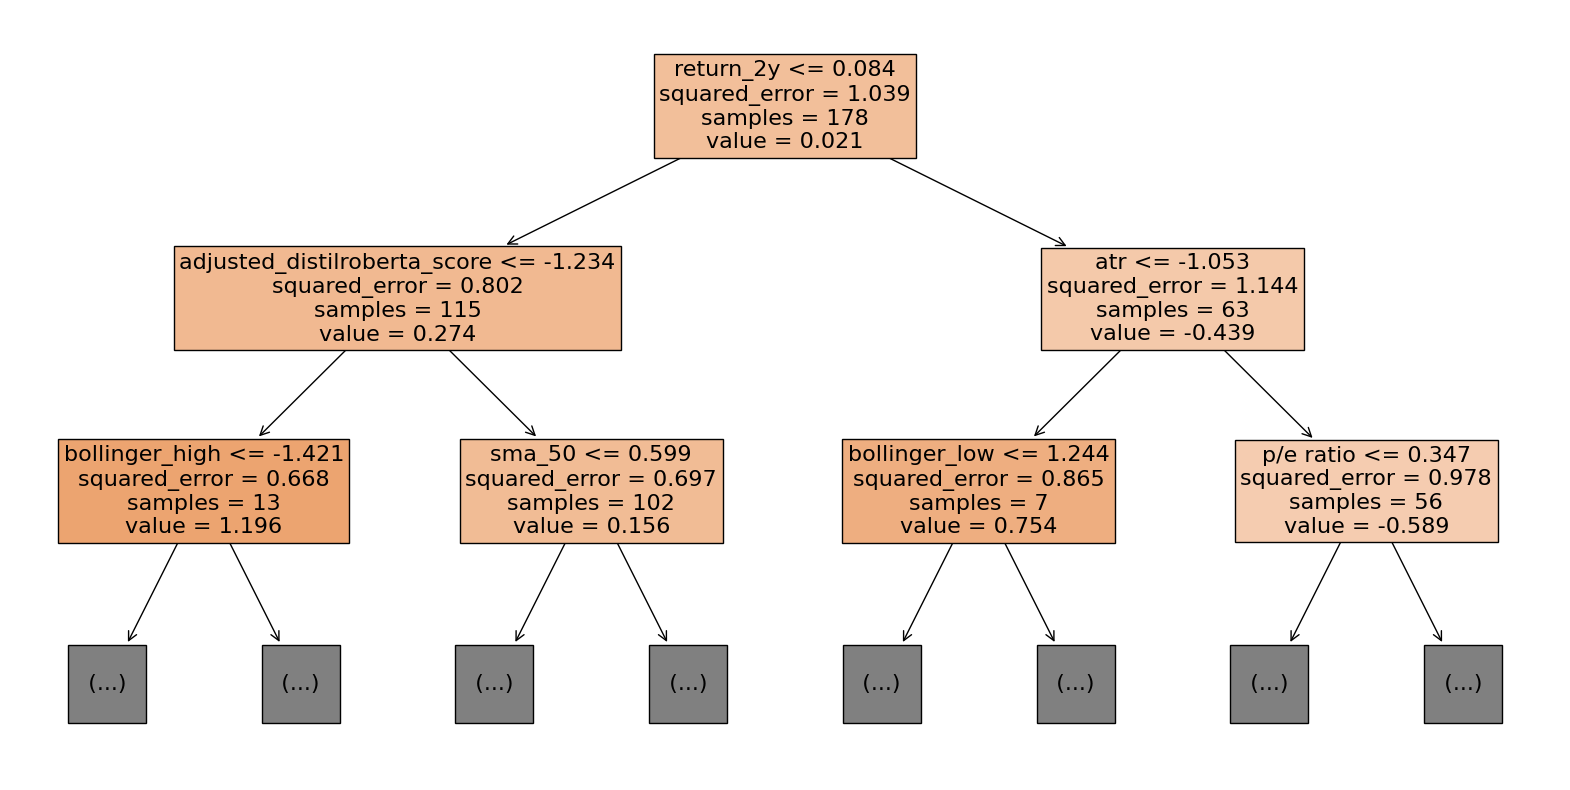

In [83]:
# Print the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate a new Decision Tree Regressor model
reg_print = DecisionTreeRegressor(random_state=10, max_depth=5)   # max_depth = 5 (see previous cell output)

# Fit the model on the training data
reg_print.fit(X_goog_train_sa, y_goog_train_sa)

# Plot the tree
plt.figure(figsize=(20,10))
feature_names = goog_df.drop(columns=['symbol', 'return_next_2w']).columns
plot_tree(reg_print, filled=True, feature_names=feature_names, max_depth=2, fontsize=16)
plt.show()

### 5.2 Apple Inc.

#### 5.2.1 Traditional Analysis Without Sentiment Scores

In [84]:
best_max_depth = find_best_max_depth('aapl')
dt_r2_aapl, dt_mse_aapl, dt_mae_aapl = decision_tree('aapl', max_depth=best_max_depth)

Best max_depth for aapl: 7
R^2 on training set for aapl: 0.9045798615130306
R^2 on test set for aapl: 0.6319638179968237
Mean Squared Error (MSE) for aapl: 0.00036951959685462595
Mean Absolute Error (MAE) for aapl: 0.015907236484928842
Root Mean Squared Error (RMSE) for aapl: 0.01922289252049821
           Feature  Importance
15  bollinger_high    0.345923
6       ichimoku_b    0.209673
1           ema_50    0.109695
8              atr    0.086912
9        return_1m    0.061275
2        return_1y    0.045215
7           sma_50    0.037644
3        p/e ratio    0.035594
12            macd    0.023243
10       return_2d    0.021871
13       return_1d    0.014813
0       ichimoku_a    0.003281
11   bollinger_low    0.002523
4        return_2y    0.002339
5              eps    0.000000
14    currentratio    0.000000


#### 5.2.2 Enhanced Analysis Using Sentiment Scores

In [85]:
best_max_depth = find_best_max_depth('aapl', sa=True)
dt_r2_aapl_sa, dt_mse_aapl_sa, dt_mae_aapl_sa = decision_tree('aapl', sa=True, max_depth=best_max_depth)

Best max_depth for aapl: 3
R^2 on training set for aapl: 0.591311003514488
R^2 on test set for aapl: 0.33842612897241053
Mean Squared Error (MSE) for aapl: 0.000664240425441538
Mean Absolute Error (MAE) for aapl: 0.021624475535670363
Root Mean Squared Error (RMSE) for aapl: 0.02577286218955004
                         Feature  Importance
15                bollinger_high    0.380967
6                     ichimoku_b    0.315368
17  adjusted_distilroberta_score    0.196448
2                      return_1y    0.059293
9                      return_1m    0.032992
10                     return_2d    0.014932
5                            eps    0.000000
4                      return_2y    0.000000
7                         sma_50    0.000000
8                            atr    0.000000
1                         ema_50    0.000000
11                 bollinger_low    0.000000
12                          macd    0.000000
13                     return_1d    0.000000
14                  currentrat

### 5.3 Amazon, Inc.

#### 5.3.1 Traditional Analysis Without Sentiment Scores

In [86]:
best_max_depth = find_best_max_depth('amzn')
dt_r2_amzn, dt_mse_amzn, dt_mae_amzn = decision_tree('amzn', max_depth=best_max_depth)

Best max_depth for amzn: 9
R^2 on training set for amzn: 0.9708561258487453
R^2 on test set for amzn: -0.05623815760069317
Mean Squared Error (MSE) for amzn: 0.001432287290302979
Mean Absolute Error (MAE) for amzn: 0.025595787908521524
Root Mean Squared Error (RMSE) for amzn: 0.037845571607560365
           Feature  Importance
9        return_1m    0.260840
8              atr    0.157539
3        p/e ratio    0.125278
12            macd    0.113636
4        return_2y    0.108586
10       return_2d    0.062466
15  bollinger_high    0.049885
11   bollinger_low    0.030497
0       ichimoku_a    0.028068
2        return_1y    0.023175
7           sma_50    0.013731
13       return_1d    0.010688
6       ichimoku_b    0.009999
1           ema_50    0.005299
14    currentratio    0.000313
5              eps    0.000000


#### 5.3.2 Enhanced Analysis Using Sentiment Scores

In [87]:
best_max_depth = find_best_max_depth('amzn', sa=True)
dt_r2_amzn_sa, dt_mse_amzn_sa, dt_mae_amzn_sa = decision_tree('amzn', sa=True, max_depth=best_max_depth)

Best max_depth for amzn: 10
R^2 on training set for amzn: 0.998548585419879
R^2 on test set for amzn: 0.6161537327477474
Mean Squared Error (MSE) for amzn: 0.0005205058405241628
Mean Absolute Error (MAE) for amzn: 0.01753159195899196
Root Mean Squared Error (RMSE) for amzn: 0.02281459709318056
                         Feature  Importance
16             textblob_polarity    0.186713
8                            atr    0.171231
7                         sma_50    0.112091
0                     ichimoku_a    0.087761
12                          macd    0.075473
6                     ichimoku_b    0.067628
4                      return_2y    0.064587
2                      return_1y    0.055058
11                 bollinger_low    0.047462
3                      p/e ratio    0.042070
17  adjusted_distilroberta_score    0.030649
9                      return_1m    0.022615
15                bollinger_high    0.016241
13                     return_1d    0.009653
10                     return_

### 5.4 Nvidia Corporation

#### 5.4.1 Traditional Analysis Without Sentiment Scores

In [88]:
best_max_depth = find_best_max_depth('nvda')
dt_r2_nvda, dt_mse_nvda, dt_mae_nvda = decision_tree('nvda', max_depth=best_max_depth)

Best max_depth for nvda: 11
R^2 on training set for nvda: 0.9973771214250396
R^2 on test set for nvda: 0.1003687183296399
Mean Squared Error (MSE) for nvda: 0.002330742462637632
Mean Absolute Error (MAE) for nvda: 0.03589438936465818
Root Mean Squared Error (RMSE) for nvda: 0.04827776364577829
           Feature  Importance
3        p/e ratio    0.306277
11   bollinger_low    0.165333
7           sma_50    0.110899
8              atr    0.096865
12            macd    0.095147
9        return_1m    0.072395
1           ema_50    0.042558
15  bollinger_high    0.037835
10       return_2d    0.032310
4        return_2y    0.014511
2        return_1y    0.012753
13       return_1d    0.010509
0       ichimoku_a    0.001575
6       ichimoku_b    0.000883
14    currentratio    0.000148
5              eps    0.000000


#### 5.4.2 Enhanced Analysis Using Sentiment Scores

In [89]:
best_max_depth = find_best_max_depth('nvda', sa=True)
dt_r2_nvda_sa, dt_mse_nvda_sa, dt_mae_nvda_sa = decision_tree('nvda', sa=True, max_depth=best_max_depth)

Best max_depth for nvda: 7
R^2 on training set for nvda: 0.8818065172243901
R^2 on test set for nvda: 0.20503007539620355
Mean Squared Error (MSE) for nvda: 0.002059588408657434
Mean Absolute Error (MAE) for nvda: 0.03548703973009267
Root Mean Squared Error (RMSE) for nvda: 0.04538268842474445
                         Feature    Importance
3                      p/e ratio  2.563477e-01
11                 bollinger_low  1.659752e-01
9                      return_1m  1.386488e-01
7                         sma_50  1.161059e-01
16             textblob_polarity  8.964110e-02
4                      return_2y  6.791190e-02
17  adjusted_distilroberta_score  5.571809e-02
8                            atr  3.314396e-02
12                          macd  2.323886e-02
10                     return_2d  2.184280e-02
15                bollinger_high  1.509989e-02
2                      return_1y  9.865114e-03
13                     return_1d  4.874351e-03
1                         ema_50  1.556030e-03


### 5.5 Microsoft Corporation

#### 5.5.1 Traditional Analysis Without Sentiment Scores

In [90]:
best_max_depth = find_best_max_depth('msft')
dt_r2_msft, dt_mse_msft, dt_mae_msft = decision_tree('msft', max_depth=best_max_depth)

Best max_depth for msft: 3
R^2 on training set for msft: 0.42888070065027617
R^2 on test set for msft: 0.14025303357998575
Mean Squared Error (MSE) for msft: 0.00037853389190570057
Mean Absolute Error (MAE) for msft: 0.016420582648915764
Root Mean Squared Error (RMSE) for msft: 0.019455947468722784
           Feature  Importance
3        p/e ratio    0.444079
8              atr    0.270503
4        return_2y    0.137811
1           ema_50    0.129687
11   bollinger_low    0.017919
0       ichimoku_a    0.000000
2        return_1y    0.000000
5              eps    0.000000
6       ichimoku_b    0.000000
7           sma_50    0.000000
9        return_1m    0.000000
10       return_2d    0.000000
12            macd    0.000000
13       return_1d    0.000000
14    currentratio    0.000000
15  bollinger_high    0.000000


#### 5.5.2 Enhanced Analysis Using Sentiment Scores

In [91]:
best_max_depth = find_best_max_depth('msft', sa=True)
dt_r2_msft_sa, dt_mse_msft_sa, dt_mae_msft_sa = decision_tree('msft', sa=True, max_depth=best_max_depth)

Best max_depth for msft: 3
R^2 on training set for msft: 0.44600806546393146
R^2 on test set for msft: 0.3483457001400879
Mean Squared Error (MSE) for msft: 0.0002869137640929448
Mean Absolute Error (MAE) for msft: 0.013342750641094142
Root Mean Squared Error (RMSE) for msft: 0.01693852898255763
                         Feature  Importance
3                      p/e ratio    0.427025
8                            atr    0.260116
17  adjusted_distilroberta_score    0.170921
1                         ema_50    0.124707
11                 bollinger_low    0.017231
16             textblob_polarity    0.000000
15                bollinger_high    0.000000
14                  currentratio    0.000000
13                     return_1d    0.000000
12                          macd    0.000000
0                     ichimoku_a    0.000000
10                     return_2d    0.000000
7                         sma_50    0.000000
6                     ichimoku_b    0.000000
5                           

## 6. Random Forest <a class='anchor' id='chapter6'></a>

The random forest model is implemented by a function where the user can define the stock (goog, aapl, amzn, nvda, msft) and choose whether the textblob and distilroberta sentiment scores should be inculded or not. A second funtion find_best_max_depth__n_estimators() is integrated that helps to choose the best max_depth and n_estimators parameters for each application.

In [92]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(stock, sa=False, max_depth=7, print_info=True, n_estimators=350):
    if sa:
        # Construct dynamic variable names (with sentiment scores)
        X_train = globals()[f'X_{stock}_train_sa']
        X_test = globals()[f'X_{stock}_test_sa']
        y_train = globals()[f'y_{stock}_train_sa']
        y_test = globals()[f'y_{stock}_test_sa']
        target_scaler = globals()[f'target_scaler_{stock}']
    else:
        # Construct dynamic variable names
        X_train = globals()[f'X_{stock}_train']
        X_test = globals()[f'X_{stock}_test']
        y_train = globals()[f'y_{stock}_train']
        y_test = globals()[f'y_{stock}_test']
        target_scaler = globals()[f'target_scaler_{stock}']

    # Instantiate the Random Forest Regressor model
    reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
    
    # Fit the model on the training data
    reg.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = reg.predict(X_test)

    # Apply the inverse transformation directly on reshaped arrays and flatten the results
    y_test_inverse = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inverse = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Calculate regression metrics
    r2_train = reg.score(X_train, y_train)
    r2_test = reg.score(X_test, y_test)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

    # Print regression metrics
    if print_info:
        print(f'R^2 on training set for {stock}:', r2_train)
        print(f'R^2 on test set for {stock}:', r2_test)
        print(f'Mean Squared Error (MSE) for {stock}:', mse)
        print(f'Mean Absolute Error (MAE) for {stock}:', mae)
        print(f"Root Mean Squared Error (RMSE) for {stock}:", np.sqrt(mse))

    # Retrieve the feature names
    if sa:
        feature_names = selected_features_df.drop(columns=['symbol', 'return_next_2w']).columns
    else:
        feature_names = selected_features_df.drop(columns=['symbol', 'return_next_2w', 'textblob_polarity', 'adjusted_distilroberta_score']).columns

    if print_info:
        # Get the feature importances from the model
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': reg.feature_importances_})

        # Sort by the absolute value of importance
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        # Print the feature importance
        print(feature_importance)

    # Return the regression metrics
    return r2_test, mse, mae

In [93]:
def find_best_max_depth__n_estimators(stock, sa=False):
    # Define the max_depth and n_estimators values to test
    max_depth_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None]
    n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

    # Initialize variables to store the best results
    best_max_depth = None
    best_n_estimators = None
    best_mse = float('inf')

    # Loop through the max_depth values and call the random_forest function
    for depth in max_depth_values:
        for estimators in n_estimators_values:
            r2_test, mse, mae = random_forest(stock, sa=sa, max_depth=depth, n_estimators=estimators, print_info=False)

            # Update the best results if the current mse is lower
            if mse < best_mse:
                best_mse = mse
                best_max_depth = depth
                best_n_estimators = estimators

    # Print the best parameters
    print(f'Best max_depth for {stock}: {best_max_depth}')
    print(f'Best n_estimators for {stock}: {best_n_estimators}')

    # Return the best max_depth value
    return best_max_depth, best_n_estimators

### 6.1 Alphabet Inc.

#### 6.1.1 Traditional Analysis Without Sentiment Scores

In [94]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('goog')
rf_r2_goog, rf_mse_goog, rf_mae_goog = random_forest('goog', max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for goog: 13
Best n_estimators for goog: 450
R^2 on training set for goog: 0.9346326803687174
R^2 on test set for goog: 0.6799780658493166
Mean Squared Error (MSE) for goog: 0.0002705722191995848
Mean Absolute Error (MAE) for goog: 0.01296981383635049
Root Mean Squared Error (RMSE) for goog: 0.016449079585179983
           Feature  Importance
4        return_2y    0.116752
11   bollinger_low    0.113300
12            macd    0.093660
7           sma_50    0.089775
15  bollinger_high    0.086955
10       return_2d    0.079288
3        p/e ratio    0.066644
8              atr    0.062354
2        return_1y    0.061228
6       ichimoku_b    0.055127
9        return_1m    0.052810
0       ichimoku_a    0.049589
1           ema_50    0.033933
13       return_1d    0.027270
5              eps    0.007925
14    currentratio    0.003390


#### 6.1.2 Enhanced Analysis Using Sentiment Scores

In [95]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('goog', sa=True)
rf_r2_goog_sa, rf_mse_goog_sa, rf_mae_goog_sa = random_forest('goog', sa=True, max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for goog: 11
Best n_estimators for goog: 100
R^2 on training set for goog: 0.9290557000012662
R^2 on test set for goog: 0.7301944951369777
Mean Squared Error (MSE) for goog: 0.0002281152209044497
Mean Absolute Error (MAE) for goog: 0.012979806926142956
Root Mean Squared Error (RMSE) for goog: 0.015103483734041285
                         Feature  Importance
17  adjusted_distilroberta_score    0.114097
11                 bollinger_low    0.102257
4                      return_2y    0.100293
7                         sma_50    0.078371
16             textblob_polarity    0.076430
12                          macd    0.075530
15                bollinger_high    0.068397
6                     ichimoku_b    0.066594
8                            atr    0.048867
10                     return_2d    0.048678
3                      p/e ratio    0.046327
9                      return_1m    0.043725
2                      return_1y    0.038701
0                     ichimoku_a    0.03

### 6.2 Apple Inc.

#### 6.2.1 Traditional Analysis Without Sentiment Scores

In [96]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('aapl')
rf_r2_aapl, rf_mse_aapl, rf_mae_aapl = random_forest('aapl', max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for aapl: 14
Best n_estimators for aapl: 250
R^2 on training set for aapl: 0.9486194602673497
R^2 on test set for aapl: 0.7054210800764454
Mean Squared Error (MSE) for aapl: 0.0002957662562945607
Mean Absolute Error (MAE) for aapl: 0.01511960959645379
Root Mean Squared Error (RMSE) for aapl: 0.01719785615402573
           Feature  Importance
6       ichimoku_b    0.186113
15  bollinger_high    0.165564
12            macd    0.106994
11   bollinger_low    0.060490
9        return_1m    0.055744
4        return_2y    0.054340
8              atr    0.053493
2        return_1y    0.051736
0       ichimoku_a    0.051421
1           ema_50    0.049790
13       return_1d    0.047905
7           sma_50    0.043516
3        p/e ratio    0.037903
10       return_2d    0.032549
14    currentratio    0.001277
5              eps    0.001164


#### 6.2.2 Enhanced Analysis Using Sentiment Scores

In [97]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('aapl', sa=True)
rf_r2_aapl_sa, rf_mse_aapl_sa, rf_mae_aapl_sa = random_forest('aapl', sa=True, max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for aapl: 11
Best n_estimators for aapl: 200
R^2 on training set for aapl: 0.9522101814189436
R^2 on test set for aapl: 0.5512627043815437
Mean Squared Error (MSE) for aapl: 0.00045054598618006513
Mean Absolute Error (MAE) for aapl: 0.016618563310529542
Root Mean Squared Error (RMSE) for aapl: 0.02122606855213808
                         Feature  Importance
6                     ichimoku_b    0.186506
17  adjusted_distilroberta_score    0.176571
15                bollinger_high    0.121269
12                          macd    0.085680
9                      return_1m    0.045724
11                 bollinger_low    0.045564
2                      return_1y    0.043279
7                         sma_50    0.041379
0                     ichimoku_a    0.040750
8                            atr    0.037613
4                      return_2y    0.035791
1                         ema_50    0.034531
3                      p/e ratio    0.030191
16             textblob_polarity    0.02

### 6.3 Amazon, Inc.

#### 6.3.1 Traditional Analysis Without Sentiment Scores

In [98]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('amzn')
rf_r2_amzn, rf_mse_amzn, rf_mae_amzn = random_forest('amzn', max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for amzn: 11
Best n_estimators for amzn: 150
R^2 on training set for amzn: 0.9198353163136341
R^2 on test set for amzn: 0.26473712847490705
Mean Squared Error (MSE) for amzn: 0.0009970361876617468
Mean Absolute Error (MAE) for amzn: 0.02723799113094969
Root Mean Squared Error (RMSE) for amzn: 0.031575879839867434
           Feature  Importance
9        return_1m    0.146998
8              atr    0.120118
3        p/e ratio    0.108571
10       return_2d    0.098382
4        return_2y    0.096733
12            macd    0.077515
15  bollinger_high    0.062237
13       return_1d    0.058041
2        return_1y    0.047639
11   bollinger_low    0.044246
0       ichimoku_a    0.038973
1           ema_50    0.033607
6       ichimoku_b    0.031633
7           sma_50    0.029385
5              eps    0.003036
14    currentratio    0.002886


#### 6.3.2 Enhanced Analysis Using Sentiment Scores

In [99]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('amzn', sa=True)
rf_r2_amzn_sa, rf_mse_amzn_sa, rf_mae_amzn_sa = random_forest('amzn', sa=True, max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for amzn: 11
Best n_estimators for amzn: 100
R^2 on training set for amzn: 0.9122769970153175
R^2 on test set for amzn: 0.4795192464031962
Mean Squared Error (MSE) for amzn: 0.0007057858711688804
Mean Absolute Error (MAE) for amzn: 0.023659269406137454
Root Mean Squared Error (RMSE) for amzn: 0.026566630783162556
                         Feature  Importance
16             textblob_polarity    0.184234
8                            atr    0.114519
9                      return_1m    0.102610
17  adjusted_distilroberta_score    0.096187
10                     return_2d    0.081921
4                      return_2y    0.077721
3                      p/e ratio    0.058291
12                          macd    0.046085
2                      return_1y    0.045212
13                     return_1d    0.044086
15                bollinger_high    0.037519
11                 bollinger_low    0.029321
6                     ichimoku_b    0.026573
7                         sma_50    0.01

### 6.4 Nvidia Corporation

#### 6.4.1 Traditional Analysis Without Sentiment Scores

In [100]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('nvda')
rf_r2_nvda, rf_mse_nvda, rf_mae_nvda = random_forest('nvda', max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for nvda: 9
Best n_estimators for nvda: 50
R^2 on training set for nvda: 0.9315097585976826
R^2 on test set for nvda: 0.5725523735924571
Mean Squared Error (MSE) for nvda: 0.0011074207330495842
Mean Absolute Error (MAE) for nvda: 0.02693403452977742
Root Mean Squared Error (RMSE) for nvda: 0.033277931622166426
           Feature  Importance
3        p/e ratio    0.224534
12            macd    0.171390
11   bollinger_low    0.117334
0       ichimoku_a    0.091918
9        return_1m    0.077030
8              atr    0.061597
2        return_1y    0.043779
1           ema_50    0.042592
15  bollinger_high    0.035323
10       return_2d    0.034994
4        return_2y    0.033640
7           sma_50    0.029795
13       return_1d    0.025548
6       ichimoku_b    0.008246
14    currentratio    0.001327
5              eps    0.000954


#### 6.4.2 Enhanced Analysis Using Sentiment Scores

In [101]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('nvda', sa=True)
rf_r2_nvda_sa, rf_mse_nvda_sa, rf_mae_nvda_sa = random_forest('nvda', sa=True, max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for nvda: 10
Best n_estimators for nvda: 50
R^2 on training set for nvda: 0.938964743114687
R^2 on test set for nvda: 0.576246621029547
Mean Squared Error (MSE) for nvda: 0.001097849768205933
Mean Absolute Error (MAE) for nvda: 0.028116367533283226
Root Mean Squared Error (RMSE) for nvda: 0.03313381608275649
                         Feature  Importance
3                      p/e ratio    0.214213
12                          macd    0.158271
11                 bollinger_low    0.107120
0                     ichimoku_a    0.076492
9                      return_1m    0.068847
17  adjusted_distilroberta_score    0.060528
1                         ema_50    0.054744
8                            atr    0.050119
16             textblob_polarity    0.043432
2                      return_1y    0.041763
10                     return_2d    0.026807
15                bollinger_high    0.023401
4                      return_2y    0.023105
7                         sma_50    0.020524


### 6.5 Microsoft Corporation

#### 6.5.1 Traditional Analysis Without Sentiment Scores

In [102]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('msft')
rf_r2_msft, rf_mse_msft, rf_mae_msft = random_forest('msft', max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for msft: 15
Best n_estimators for msft: 50
R^2 on training set for msft: 0.9228557738345069
R^2 on test set for msft: 0.41484627339016555
Mean Squared Error (MSE) for msft: 0.00025763454382290285
Mean Absolute Error (MAE) for msft: 0.013025432469328663
Root Mean Squared Error (RMSE) for msft: 0.016050998218892894
           Feature  Importance
4        return_2y    0.194687
8              atr    0.181849
3        p/e ratio    0.134584
11   bollinger_low    0.065132
12            macd    0.055911
2        return_1y    0.051432
10       return_2d    0.048905
7           sma_50    0.048268
1           ema_50    0.044629
15  bollinger_high    0.040735
13       return_1d    0.037231
9        return_1m    0.036198
0       ichimoku_a    0.030913
6       ichimoku_b    0.018683
5              eps    0.006468
14    currentratio    0.004374


#### 6.5.2 Enhanced Analysis Using Sentiment Scores

In [103]:
best_max_depth, best_n_estimators = find_best_max_depth__n_estimators('msft', sa=True)
rf_r2_msft_sa, rf_mse_msft_sa, rf_mae_msft_sa = random_forest('msft', sa=True, max_depth=best_max_depth, n_estimators=best_n_estimators)

Best max_depth for msft: 11
Best n_estimators for msft: 50
R^2 on training set for msft: 0.9256152974768708
R^2 on test set for msft: 0.4696286558571716
Mean Squared Error (MSE) for msft: 0.0002335146698913306
Mean Absolute Error (MAE) for msft: 0.012927071925477252
Root Mean Squared Error (RMSE) for msft: 0.01528118679590465
                         Feature  Importance
4                      return_2y    0.178877
8                            atr    0.143149
3                      p/e ratio    0.132272
17  adjusted_distilroberta_score    0.126642
16             textblob_polarity    0.055578
12                          macd    0.053358
7                         sma_50    0.040228
10                     return_2d    0.040119
11                 bollinger_low    0.039861
1                         ema_50    0.034284
15                bollinger_high    0.032298
2                      return_1y    0.027936
9                      return_1m    0.026912
13                     return_1d    0.0269

## 7. Artificial Neural Network <a class='anchor' id='chapter7'></a>

The artificial neural network (ANN) is implemented by a function where the user can define the stock (goog, aapl, amzn, nvda, msft) and choose whether the textblob and distilroberta sentiment scores should be inculded or not. The model uses six dense layers with the relu activation function.

In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

def neural_network(stock, sa=False):
    if sa:
        # Construct dynamic variable names (with sentiment scores)
        X_train = globals()[f'X_{stock}_train_sa']
        X_test = globals()[f'X_{stock}_test_sa']
        y_train = globals()[f'y_{stock}_train_sa']
        y_test = globals()[f'y_{stock}_test_sa']
    else:
        # Construct dynamic variable names
        X_train = globals()[f'X_{stock}_train']
        X_test = globals()[f'X_{stock}_test']
        y_train = globals()[f'y_{stock}_train']
        y_test = globals()[f'y_{stock}_test']

    target_scaler = globals()[f'target_scaler_{stock}']

    # Define the model architecture
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Explicit input shape
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Summary of the model
    model.summary()

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Predict the target on the test dataset
    y_pred = model.predict(X_test).flatten()

    # Apply the inverse transformation directly on the predicted values
    y_test_inverse = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inverse = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Evaluate the model
    r2_train = r2_score(y_train, model.predict(X_train).flatten())
    r2_test = r2_score(y_test_inverse, y_pred_inverse)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

    # Print regression metrics
    print(f'R^2 on training set for {stock}:', r2_train)
    print(f'R^2 on test set for {stock}:', r2_test)
    print(f'Mean Squared Error (MSE) for {stock}:', mse)
    print(f'Mean Absolute Error (MAE) for {stock}:', mae)
    print(f"Root Mean Squared Error (RMSE) for {stock}:", np.sqrt(mse))

    # Return the regression metrics
    return r2_test, mse, mae

/Users/manuelpetsch/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [105]:
nn_r2_msft_sa, nn_mse_msft_sa, nn_mae_msft_sa = neural_network('goog')

2024-08-03 17:15:32.715436: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-08-03 17:15:32.715461: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-03 17:15:32.715467: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-03 17:15:32.715674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-03 17:15:32.715686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,801 (2.73 MB)

 Trainable params: 716,801 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2024-08-03 17:15:33.411999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 1.1116 - val_loss: 0.7959
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9937 - val_loss: 0.5934
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9049 - val_loss: 0.5853
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8981 - val_loss: 0.5543
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8790 - val_loss: 0.6093
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7837 - val_loss: 0.4917
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6180 - val_loss: 0.5231
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6430 - val_loss: 0.5442
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5083 - val_loss: 0.4785
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4834 - val_loss: 0.5329
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4826 - val_loss: 0.7234
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4795 - val_loss: 0.5600


### 7.1 Alphabet Inc.

#### 7.1.1 Traditional Analysis Without Sentiment Scores

In [106]:
nn_r2_goog, nn_mse_goog, nn_mae_goog = neural_network('goog')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1024)           │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,801 (2.73 MB)

 Trainable params: 716,801 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 1.1101 - val_loss: 0.7541
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1470 - val_loss: 0.6766
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9216 - val_loss: 0.6150
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8443 - val_loss: 0.5984
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8121 - val_loss: 0.6207
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7755 - val_loss: 0.4761
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6513 - val_loss: 0.4685
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6056 - val_loss: 0.4642
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7600 - val_loss: 0.6809
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5942 - val_loss: 0.5999
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5682 - val_loss: 0.4906
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4162 - val_lo

#### 4.1.2 Enhanced Analysis Using Sentiment Scores

In [107]:
nn_r2_goog_sa, nn_mse_goog_sa, nn_mae_goog_sa = neural_network('goog', sa=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1024)           │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,849 (2.74 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 1.2163 - val_loss: 0.6793
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9903 - val_loss: 0.6239
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8841 - val_loss: 0.5627
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7431 - val_loss: 0.5845
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6523 - val_loss: 0.4860
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5212 - val_loss: 0.7246
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5263 - val_loss: 0.4483
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4246 - val_loss: 0.6391
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5285 - val_loss: 0.4923
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4017 - val_loss: 0.7807
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2912 - val_loss: 0.5392
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2784 - val_lo

### 7.2 Apple Inc.

#### 7.2.1 Traditional Analysis Without Sentiment Scores

In [108]:
nn_r2_aapl, nn_mse_aapl, nn_mae_aapl = neural_network('aapl')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 1024)           │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,801 (2.73 MB)

 Trainable params: 716,801 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.8899 - val_loss: 0.8840
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7099 - val_loss: 0.8046
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5251 - val_loss: 0.5383
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4979 - val_loss: 0.5717
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4762 - val_loss: 0.6006
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4061 - val_loss: 0.6266
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3608 - val_loss: 0.4793
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2810 - val_loss: 0.5093
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2852 - val_loss: 0.5198
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2719 - val_loss: 0.4592
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2321 - val_loss: 0.5812
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2456 - val_l

#### 7.2.2 Enhanced Analysis Using Sentiment Scores

In [109]:
nn_r2_aapl_sa, nn_mse_aapl_sa, nn_mae_aapl_sa = neural_network('aapl', sa=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 1024)           │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,849 (2.74 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 1.0001 - val_loss: 0.9353
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8036 - val_loss: 0.7258
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5577 - val_loss: 0.5725
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3169 - val_loss: 0.5095
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3315 - val_loss: 0.7006
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3236 - val_loss: 0.4314
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2254 - val_loss: 0.6032
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2709 - val_loss: 0.3534
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1958 - val_loss: 0.7292
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2000 - val_loss: 0.3702
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1464 - val_loss: 0.3974
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1071 - val_lo

### 7.3 Amazon, Inc.

#### 7.3.1 Traditional Analysis Without Sentiment Scores

In [110]:
nn_r2_amzn, nn_mse_amzn, nn_mae_amzn = neural_network('amzn')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 1024)           │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,801 (2.73 MB)

 Trainable params: 716,801 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.9870 - val_loss: 0.9351
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0802 - val_loss: 0.7796
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0375 - val_loss: 0.7385
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8559 - val_loss: 0.7378
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5968 - val_loss: 0.8115
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5873 - val_loss: 0.8180
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5232 - val_loss: 0.9367
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4149 - val_loss: 1.0425
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4107 - val_loss: 0.7335
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3361 - val_loss: 0.7432
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3104 - val_loss: 0.9484
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2862 - val_lo

#### 7.3.2 Enhanced Analysis Using Sentiment Scores

In [111]:
nn_r2_amzn_sa, nn_mse_amzn_sa, nn_mae_amzn_sa = neural_network('amzn', sa=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 1024)           │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,849 (2.74 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.8597 - val_loss: 0.8108
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9358 - val_loss: 0.7539
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7473 - val_loss: 0.8497
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5669 - val_loss: 0.7287
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4599 - val_loss: 0.8087
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3707 - val_loss: 0.6978
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3189 - val_loss: 0.6010
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2472 - val_loss: 0.7872
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2056 - val_loss: 0.6927
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2150 - val_loss: 0.6048
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2165 - val_loss: 0.6827
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1725 - val_l

### 7.4 Nvidia Corporation

#### 7.4.1 Traditional Analysis Without Sentiment Scores

In [112]:
nn_r2_nvda, nn_mse_nvda, nn_mae_nvda = neural_network('nvda')

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 1024)           │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,801 (2.73 MB)

 Trainable params: 716,801 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 1.0460 - val_loss: 0.8869
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8848 - val_loss: 0.9229
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6983 - val_loss: 0.7867
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6109 - val_loss: 0.5210
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4409 - val_loss: 0.8124
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5359 - val_loss: 0.5691
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4451 - val_loss: 0.5327
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3646 - val_loss: 0.4773
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4377 - val_loss: 0.8318
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4293 - val_loss: 0.4284
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3122 - val_loss: 0.5362
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3160 - val_l

#### 7.4.2 Enhanced Analysis Using Sentiment Scores

In [113]:
nn_r2_nvda_sa, nn_mse_nvda_sa, nn_mae_nvda_sa = neural_network('nvda', sa=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 1024)           │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,849 (2.74 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.9858 - val_loss: 0.9214
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9296 - val_loss: 0.9761
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7046 - val_loss: 0.8473
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5032 - val_loss: 0.8310
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4549 - val_loss: 0.6059
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3391 - val_loss: 0.6787
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2796 - val_loss: 0.4175
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3403 - val_loss: 0.5555
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3317 - val_loss: 0.4704
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2675 - val_loss: 0.4693
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1963 - val_loss: 0.4375
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1572 - val_lo

### 7.5 Microsoft Corporation

#### 7.5.1 Traditional Analysis Without Sentiment Scores

In [114]:
nn_r2_msft, nn_mse_msft, nn_mae_msft = neural_network('msft')

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 1024)           │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,801 (2.73 MB)

 Trainable params: 716,801 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.9705 - val_loss: 1.1565
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9592 - val_loss: 0.8769
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7846 - val_loss: 0.8075
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6158 - val_loss: 0.7587
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5520 - val_loss: 0.7349
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6856 - val_loss: 0.7213
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5715 - val_loss: 0.7561
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5042 - val_loss: 0.7077
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3563 - val_loss: 0.7606
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4391 - val_loss: 0.7017
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4082 - val_loss: 0.5379
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3521 - val_l

#### 7.5.2 Enhanced Analysis Using Sentiment Scores

In [115]:
nn_r2_msft_sa, nn_mse_msft_sa, nn_mae_msft_sa = neural_network('msft', sa=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 1024)           │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,849 (2.74 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.9865 - val_loss: 0.9444
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7327 - val_loss: 0.8413
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8251 - val_loss: 0.8643
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6779 - val_loss: 0.8467
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5050 - val_loss: 0.6929
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5194 - val_loss: 0.6728
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4338 - val_loss: 0.5962
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3933 - val_loss: 0.6473
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3256 - val_loss: 0.6404
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3588 - val_loss: 0.6403
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3553 - val_loss: 0.6151
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3126 - val_l

## 8. Results <a class='anchor' id='chapter8'></a>

When running the four models for all stocks with and without sentiment scores, all results on the test sets (R2, MSE, MAE) were saved in variables. These values are now combined into one data frame per model and then visualised.

In [116]:
# Define a function to create a comparison table for a given model
def create_comparison_table(model_name):
    stocks = ['goog', 'aapl', 'amzn', 'nvda', 'msft']
    metrics = ['r2', 'mse', 'mae']
    results = {'Stock': [], 'R²': [], 'R² (SA)': [], 'MSE': [], 'MSE (SA)': [], 'MAE': [], 'MAE (SA)': []}

    for stock in stocks:
        results['Stock'].append(stock.upper())
        for metric in metrics:
            # Construct variable names dynamically
            sa_variable = globals()[f'{model_name}_{metric}_{stock}_sa']
            no_sa_variable = globals()[f'{model_name}_{metric}_{stock}']
            
            # Append results to the dictionary
            if metric == 'r2':
                results['R² (SA)'].append(sa_variable)
                results['R²'].append(no_sa_variable)
            elif metric == 'mse':
                results['MSE (SA)'].append(sa_variable)
                results['MSE'].append(no_sa_variable)
            elif metric == 'mae':
                results['MAE (SA)'].append(sa_variable)
                results['MAE'].append(no_sa_variable)

    # Create a DataFrame from the results dictionary
    df = pd.DataFrame(results)

    # Reorder the columns as specified
    df = df[['Stock', 'R²', 'R² (SA)', 'MSE', 'MSE (SA)', 'MAE', 'MAE (SA)']]

    # Return the data frame
    return df

# Create comparison tables for each model
lr_comparison_table = create_comparison_table('lr')
dt_comparison_table = create_comparison_table('dt')
rf_comparison_table = create_comparison_table('rf')
nn_comparison_table = create_comparison_table('nn')

# Save the result data frames to csv-files
lr_comparison_table.to_csv('./data/results/lr_comparison_table.csv', index=False)
dt_comparison_table.to_csv('./data/results/dt_comparison_table.csv', index=False)
rf_comparison_table.to_csv('./data/results/rf_comparison_table.csv', index=False)
nn_comparison_table.to_csv('./data/results/nn_comparison_table.csv', index=False)

# Print the comparison tables
print("Linear Regression Comparison Table")
print(lr_comparison_table)
print("\nDecision Tree Comparison Table")
print(dt_comparison_table)
print("\nRandom Forest Comparison Table")
print(rf_comparison_table)
print("\nNeural Network Comparison Table")
print(nn_comparison_table)

Linear Regression Comparison Table
  Stock        R²   R² (SA)       MSE  MSE (SA)       MAE  MAE (SA)
0  GOOG  0.196586  0.250002  0.000679  0.000634  0.019314  0.018942
1  AAPL  0.123083  0.135898  0.000880  0.000868  0.024243  0.025089
2  AMZN -0.035865  0.056605  0.001405  0.001279  0.028522  0.027928
3  NVDA  0.022606 -0.113713  0.002532  0.002885  0.038886  0.042832
4  MSFT -0.103925 -0.070515  0.000486  0.000471  0.019285  0.018476

Decision Tree Comparison Table
  Stock        R²   R² (SA)       MSE  MSE (SA)       MAE  MAE (SA)
0  GOOG  0.484800  0.564745  0.000436  0.000368  0.016382  0.015072
1  AAPL  0.631964  0.338426  0.000370  0.000664  0.015907  0.021624
2  AMZN -0.056238  0.616154  0.001432  0.000521  0.025596  0.017532
3  NVDA  0.100369  0.205030  0.002331  0.002060  0.035894  0.035487
4  MSFT  0.140253  0.348346  0.000379  0.000287  0.016421  0.013343

Random Forest Comparison Table
  Stock        R²   R² (SA)       MSE  MSE (SA)       MAE  MAE (SA)
0  GOOG  0.679978

In [152]:
def visualize_comparison_table(data, model):
    # Create a copy of the input df
    df = data.copy()

    # Define bar width and positions
    bar_width = 0.35
    index = np.arange(len(df['Stock']))

    # Define the colors
    colors = ['steelblue', 'darkorange']  # Blue and orange for a professional look

    # Plot R² values
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(index, df['R²'], bar_width, label='R²', color=colors[0])
    ax.bar(index + bar_width, df['R² (SA)'], bar_width, label='R² (SA)', color=colors[1])
    ax.set_ylabel('R² Values')
    ax.set_title(f'{model} - Comparison of R²')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df['Stock'])
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Plot MSE values
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(index, df['MSE'], bar_width, label='MSE', color=colors[0])
    ax.bar(index + bar_width, df['MSE (SA)'], bar_width, label='MSE (SA)', color=colors[1])
    ax.set_ylabel('MSE Values')
    ax.set_title(f'{model} - Comparison of MSE')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df['Stock'])
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Plot MAE values
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(index, df['MAE'], bar_width, label='MAE', color=colors[0])
    ax.bar(index + bar_width, df['MAE (SA)'], bar_width, label='MAE (SA)', color=colors[1])
    ax.set_ylabel('MAE Values')
    ax.set_title(f'{model} - Comparison of MAE')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df['Stock'])
    ax.legend()
    plt.tight_layout()
    plt.show()

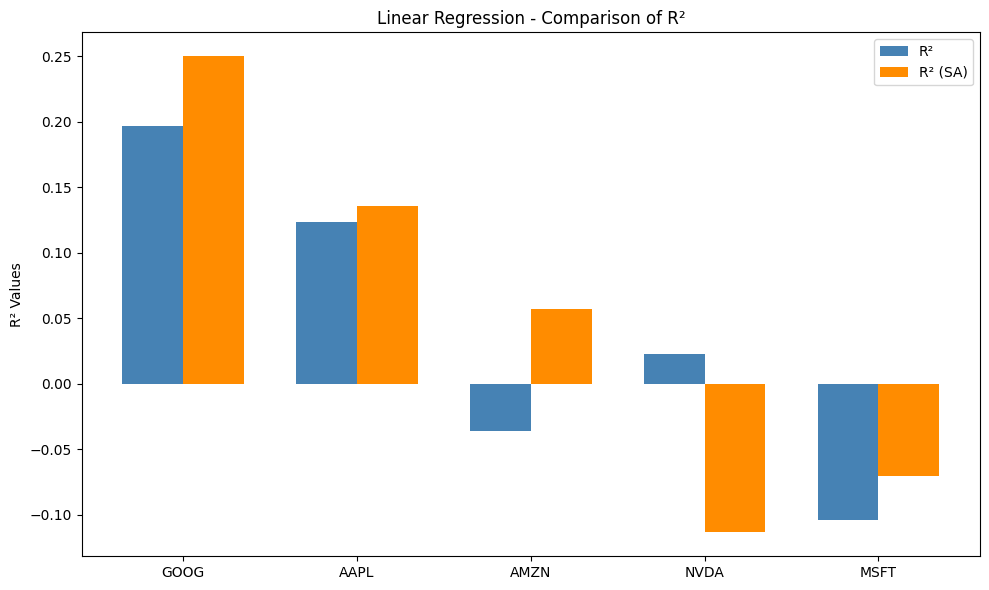

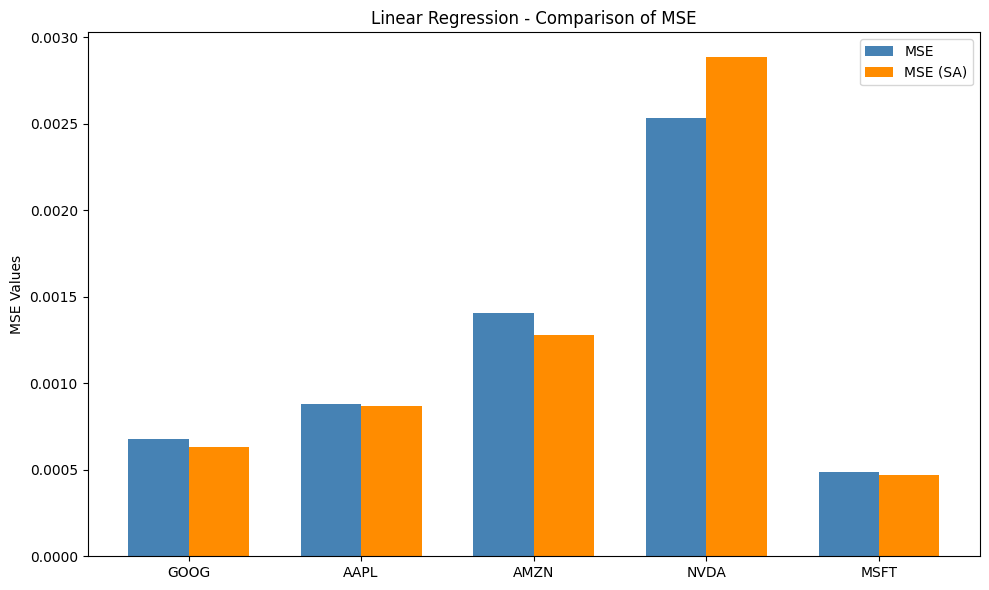

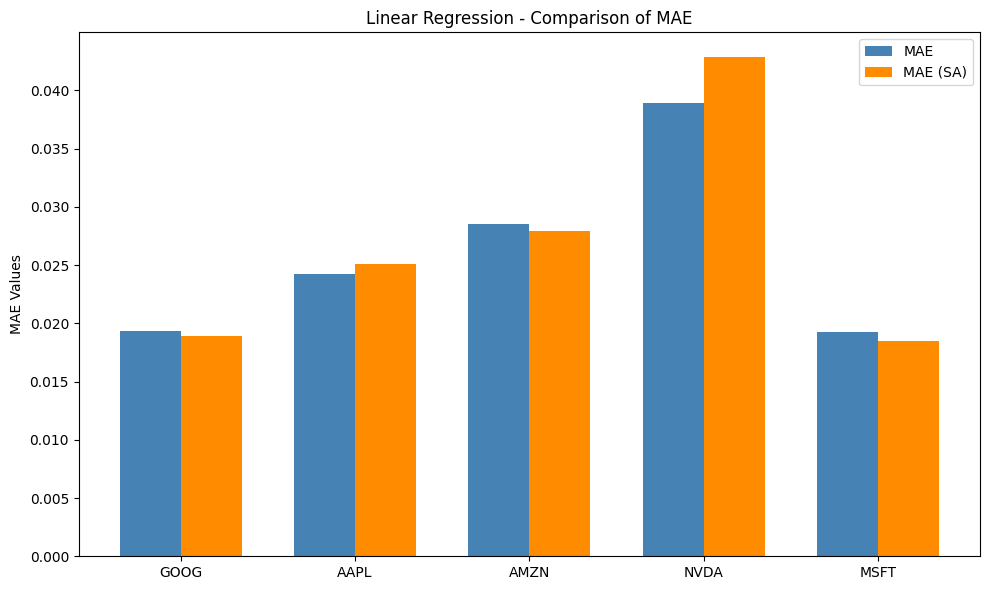

In [153]:
# Visualize the results of the Linear regression model
visualize_comparison_table(lr_comparison_table, 'Linear Regression')

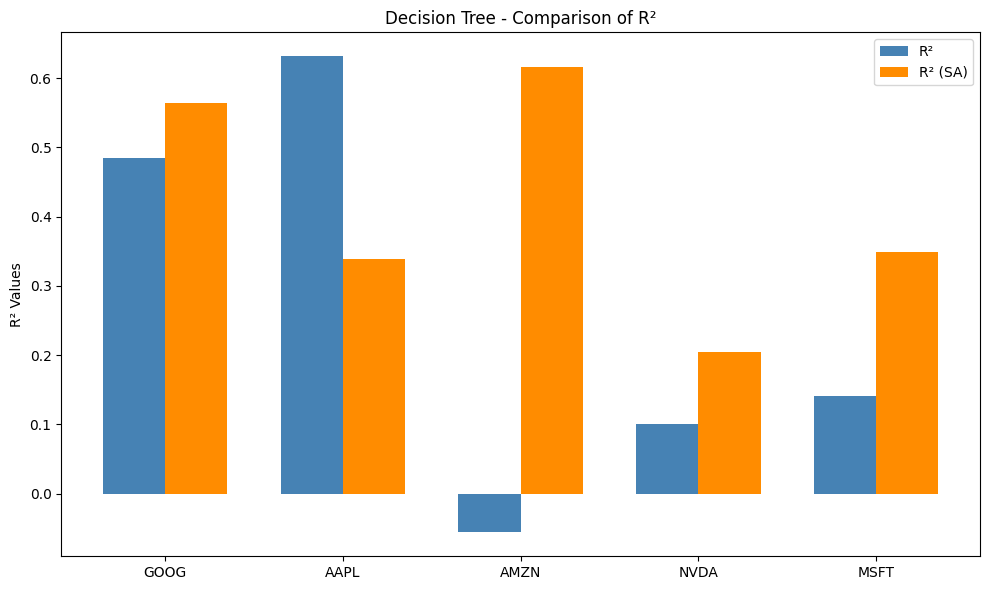

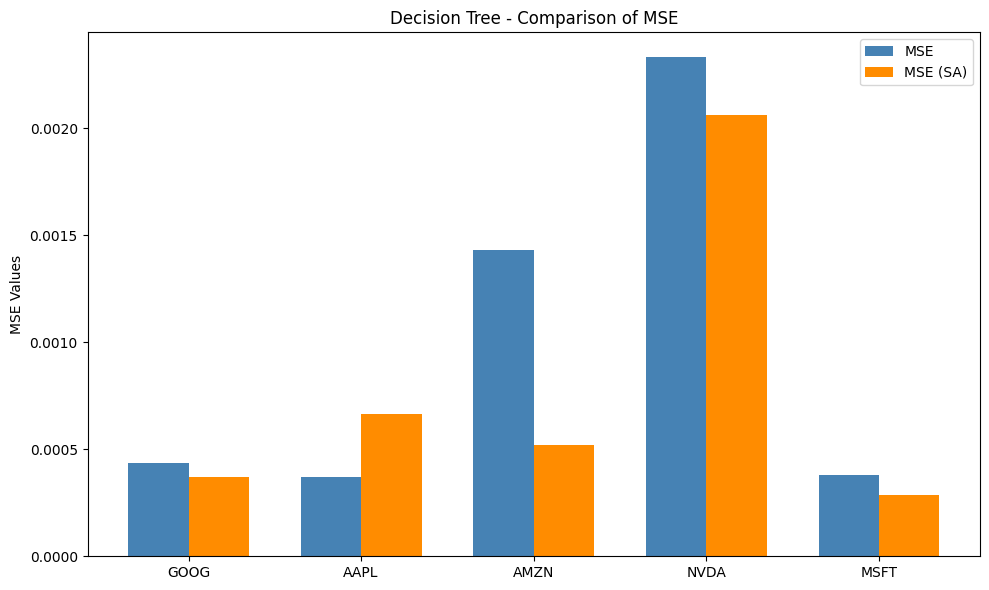

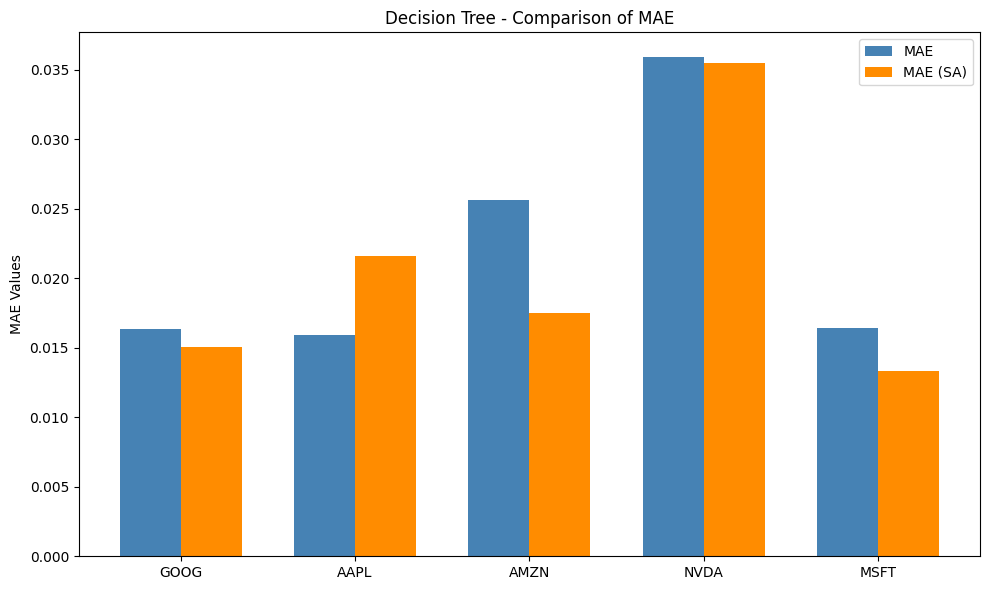

In [155]:
# Visualize the results of the Decision Tree model
visualize_comparison_table(dt_comparison_table, 'Decision Tree')

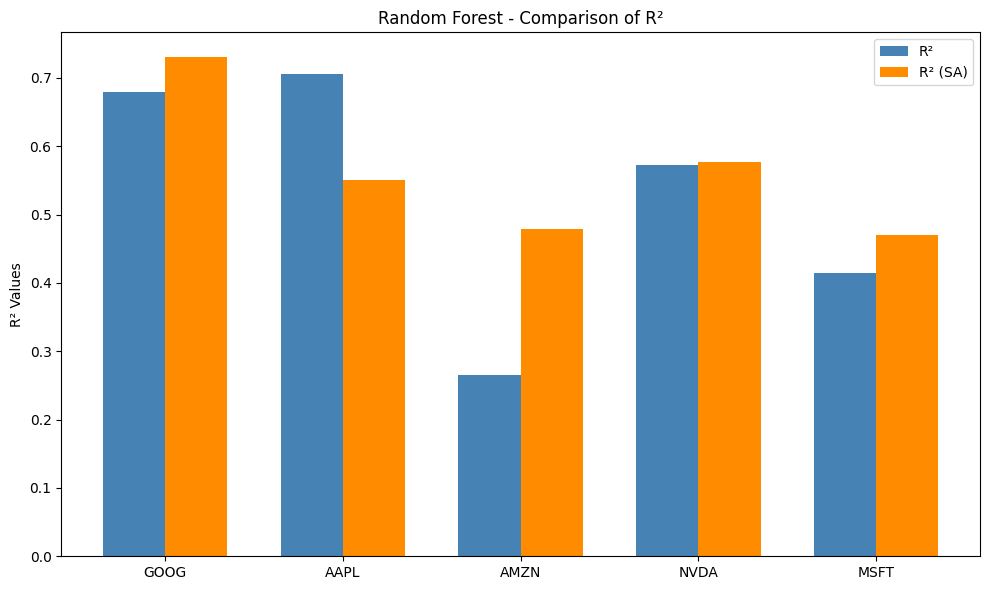

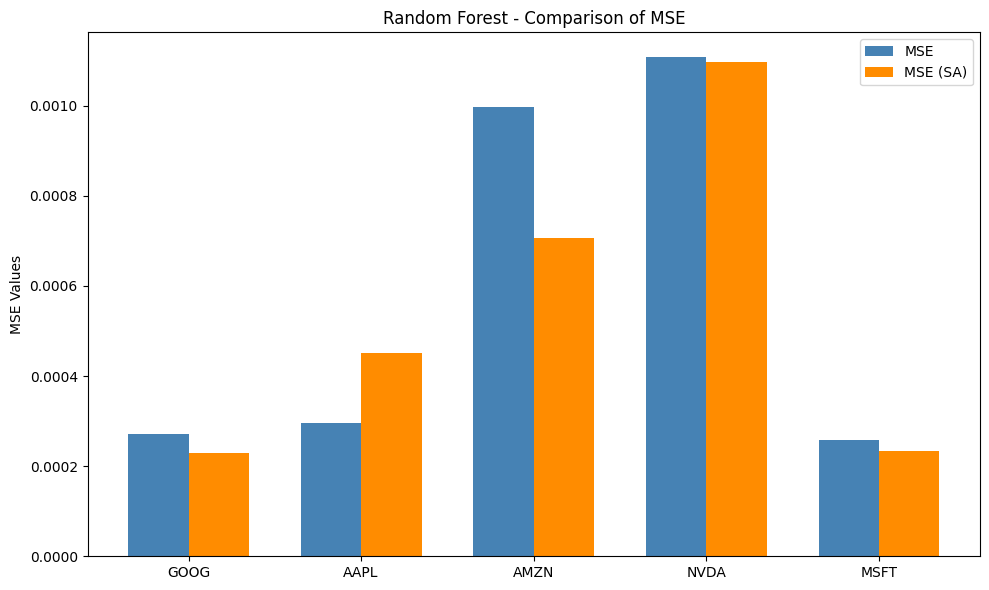

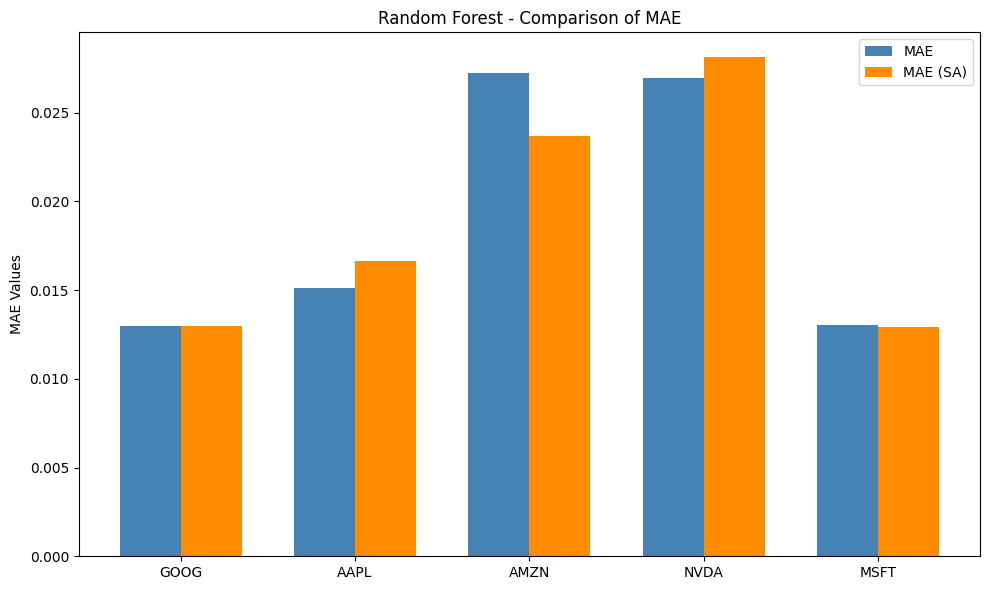

In [156]:
# Visualize the results of the Random Forest model
visualize_comparison_table(rf_comparison_table, 'Random Forest')

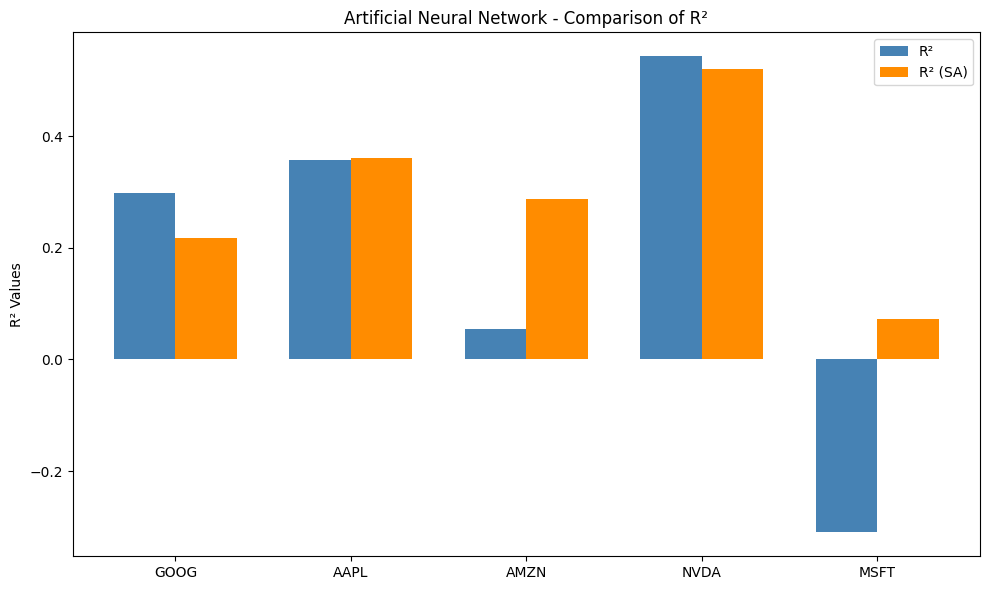

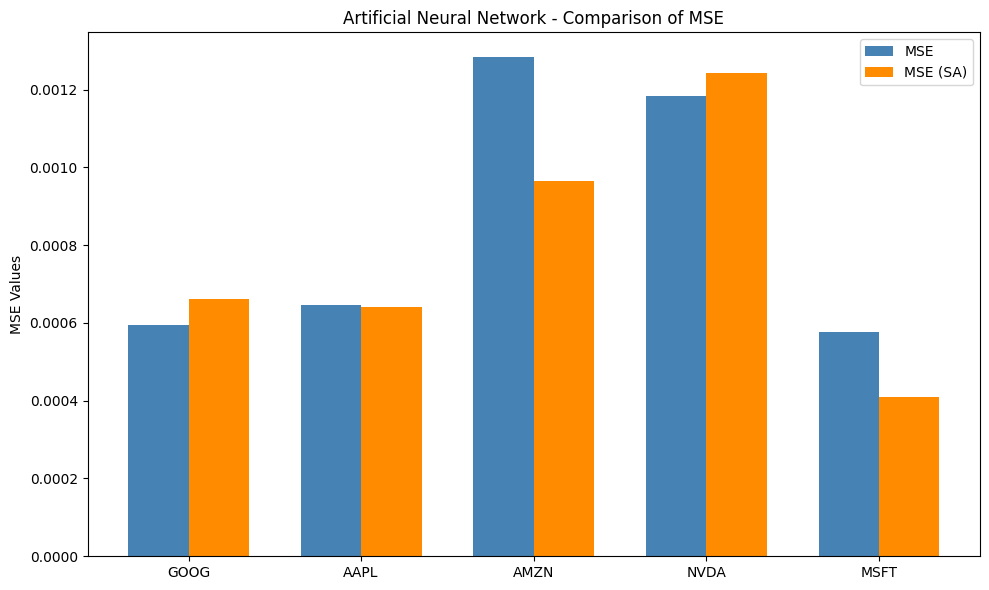

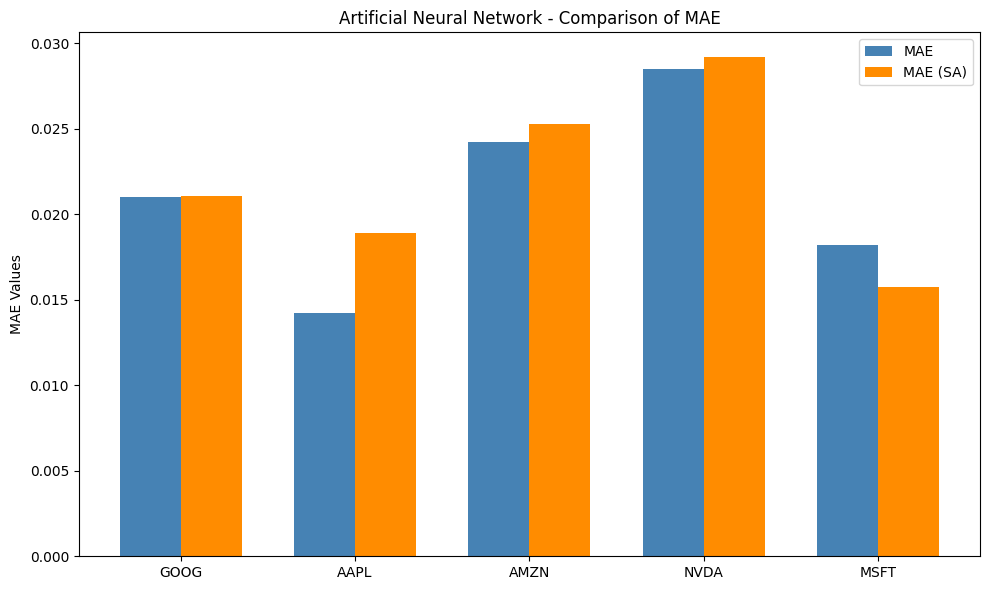

In [157]:
# Visualize the results of the Artificial Neural Network
visualize_comparison_table(nn_comparison_table, 'Artificial Neural Network')